In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# to display all columns
pd.pandas.set_option('display.max_columns', None)

# Life Cycle
1. Data Analysis
2. Feture Engineering
3. Feature Selection
4. Model Building
5. Model Deployment

In [2]:
df=pd.read_csv('C:/pypy/house_price_train.csv')
print(df.shape)

(1259, 81)


In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# to find columns with missing values
nan_cols= [col for col in df.columns if df[col].isnull().sum()>1]
print(len(nan_cols))
nan_cols

18


['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [5]:
for col in nan_cols:
    print(col, np.round(df[col].isnull().mean(),3),'% missinge values')

LotFrontage 0.173 % missinge values
Alley 0.94 % missinge values
MasVnrType 0.006 % missinge values
MasVnrArea 0.006 % missinge values
BsmtQual 0.028 % missinge values
BsmtCond 0.028 % missinge values
BsmtExposure 0.029 % missinge values
BsmtFinType1 0.028 % missinge values
BsmtFinType2 0.029 % missinge values
FireplaceQu 0.476 % missinge values
GarageType 0.056 % missinge values
GarageYrBlt 0.056 % missinge values
GarageFinish 0.056 % missinge values
GarageQual 0.056 % missinge values
GarageCond 0.056 % missinge values
PoolQC 0.997 % missinge values
Fence 0.809 % missinge values
MiscFeature 0.959 % missinge values


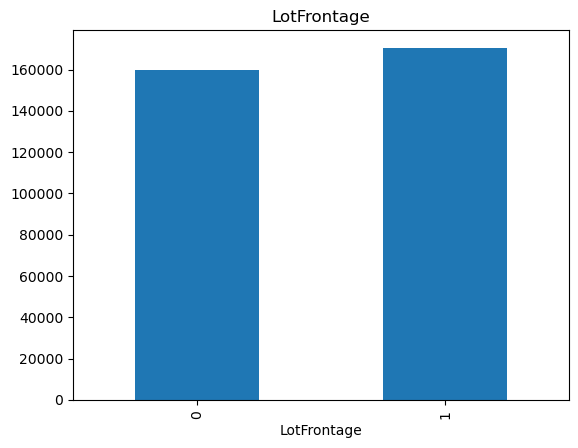

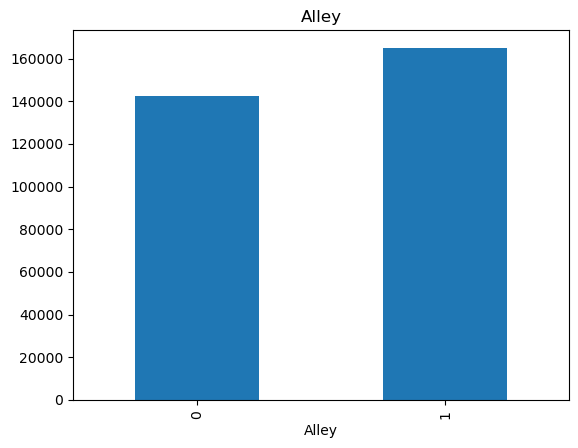

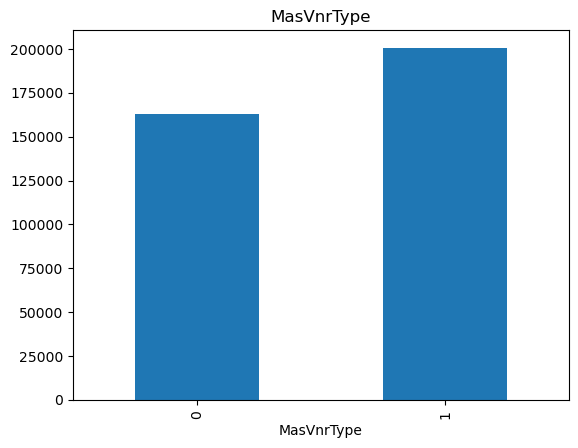

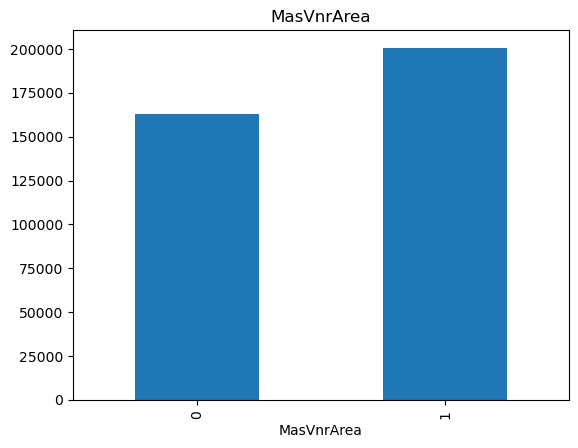

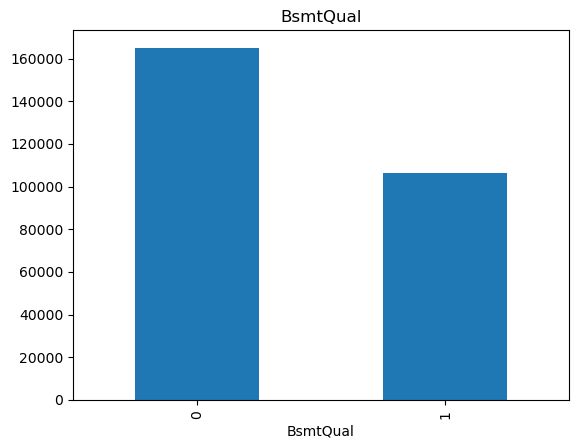

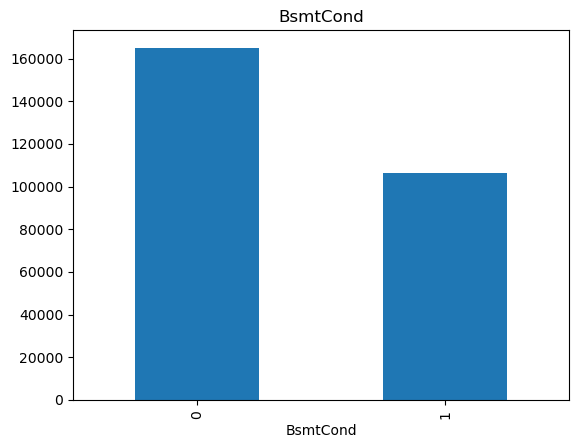

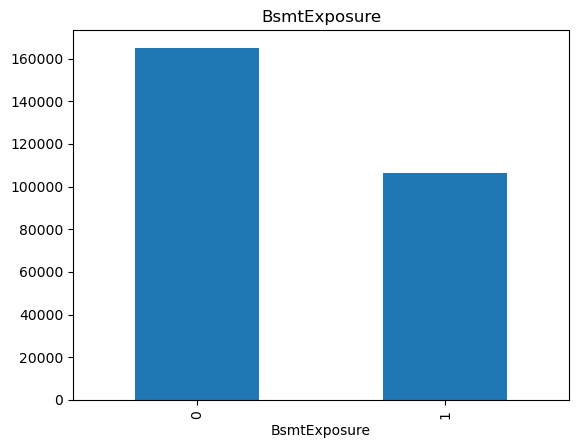

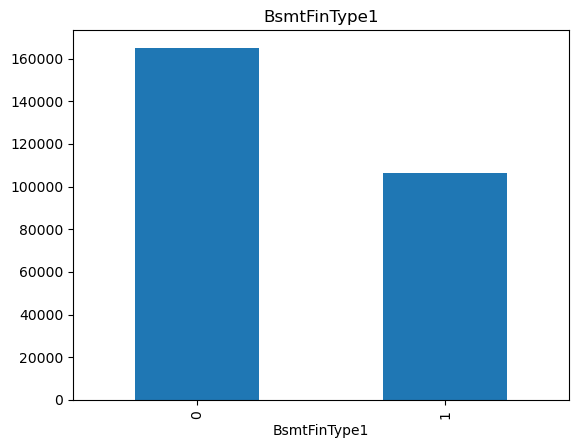

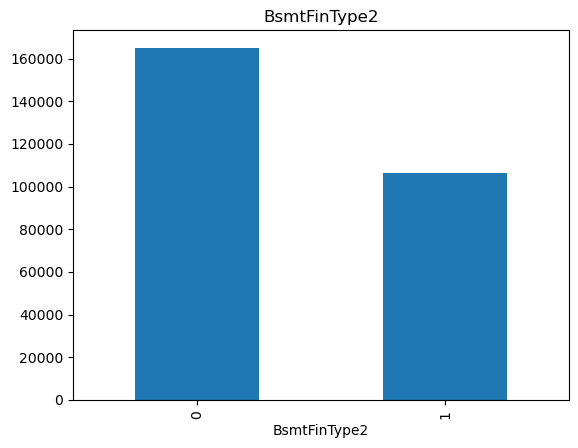

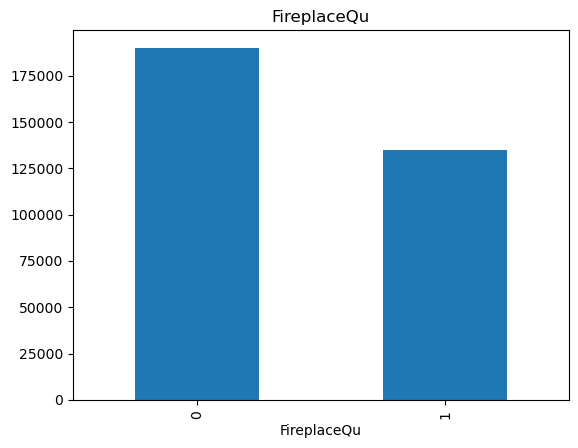

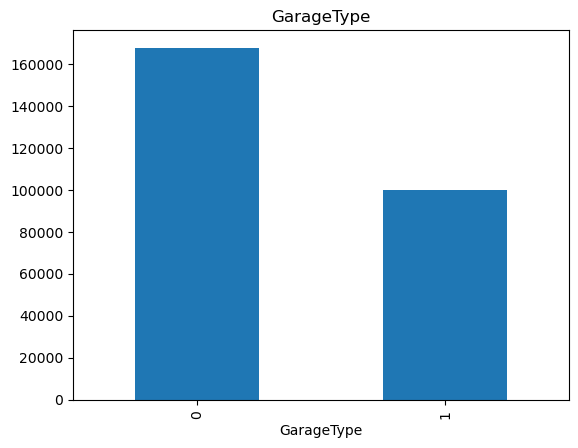

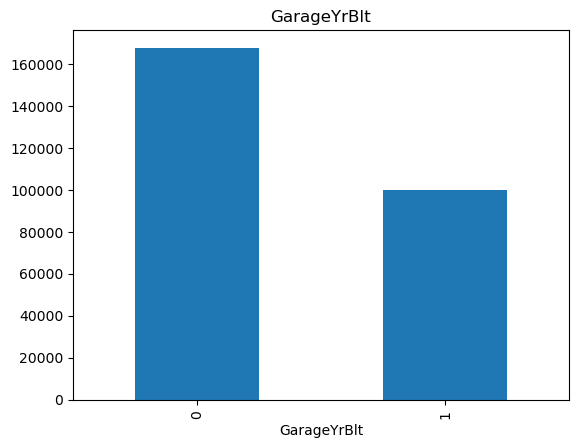

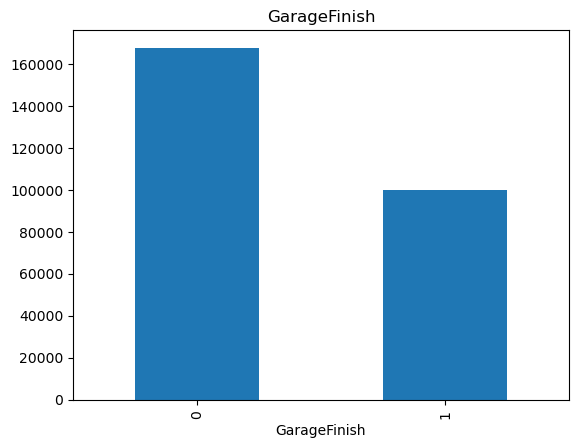

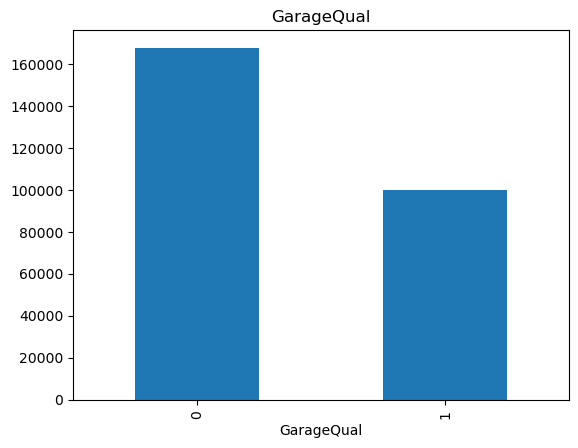

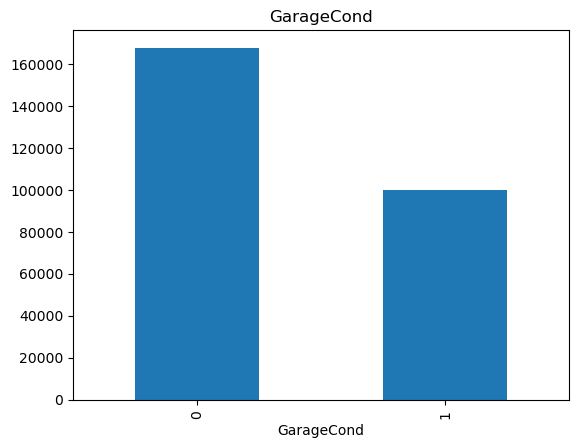

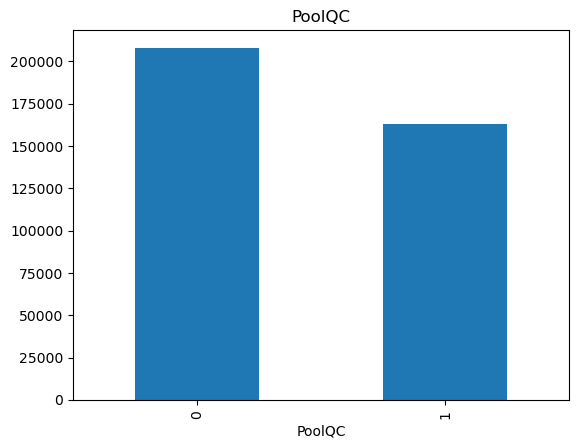

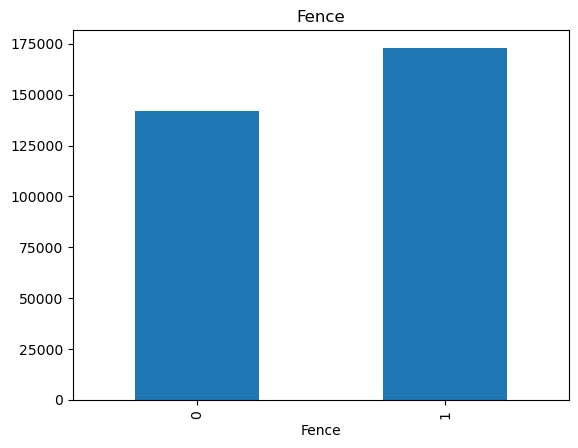

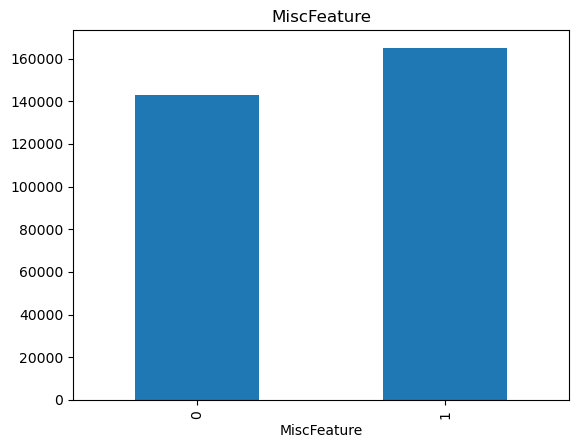

In [6]:
#relationship between missing values an d salesprice

for col in nan_cols:
    data=df.copy()
    
    data[col]=np.where(data[col].isnull(),1,0)
    data.groupby(col)['SalePrice'].median().plot.bar()
    plt.title(col)
    plt.show()

the relationship between nan values and salesprice shows that nan values play an important role on salesprice. therefore we have to use a suitable encoding technique to deal with the nan values. 

In [7]:
numerical_cols=[col for col in df.columns if df[col].dtypes !='O']
print('Number of numerical features=', len(numerical_cols))

Number of numerical features= 38


In [8]:
Year_cols=[col for col in numerical_cols if 'Yr' in col or 'Year' in col]
Year_cols

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [9]:
for col in Year_cols:
    print(col, df[col].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006. 1960. 199

<AxesSubplot:xlabel='YrSold'>

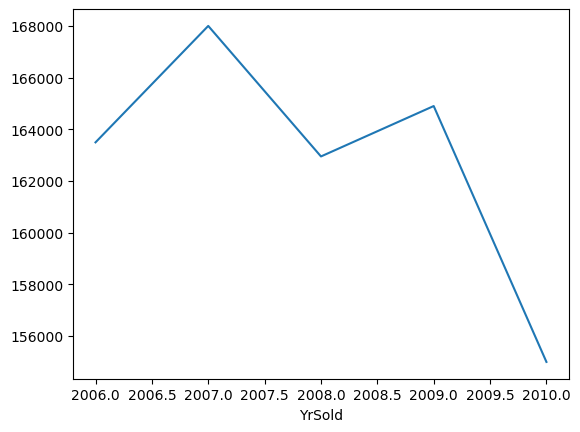

In [10]:
df.groupby('YrSold')['SalePrice'].median().plot()

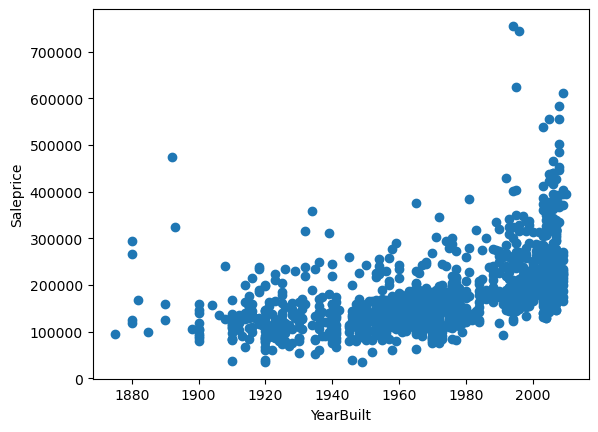

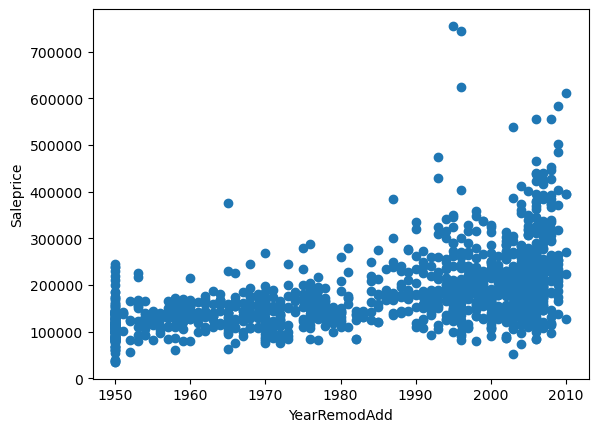

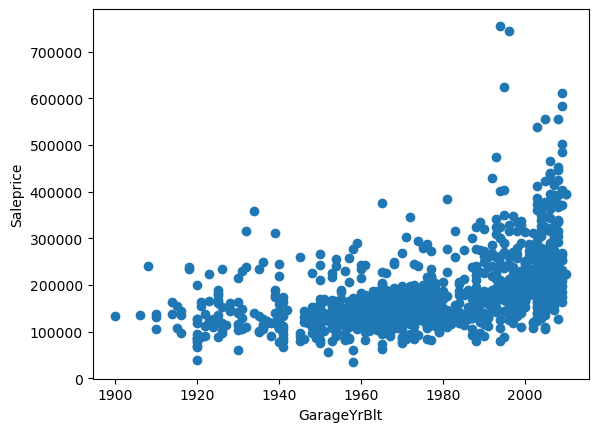

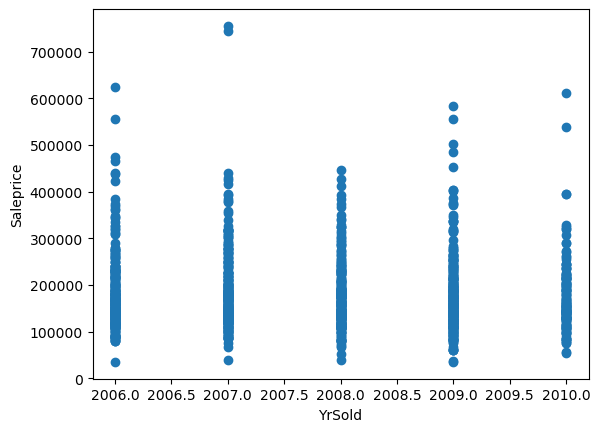

In [11]:
for col in Year_cols:
    plt.scatter(df[col],df['SalePrice'])
    plt.ylabel('Saleprice')
    plt.xlabel(col)
    plt.show()

In [12]:
discrete_cols=[col for col in numerical_cols if len(df[col].unique())<25 and col not in Year_cols + ['Id']]
print(len(discrete_cols))
discrete_cols

17


['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

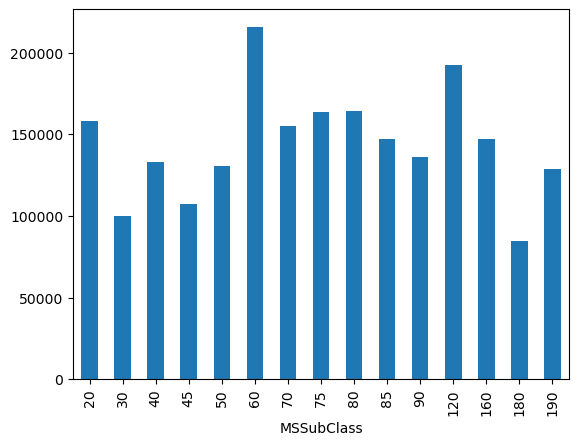

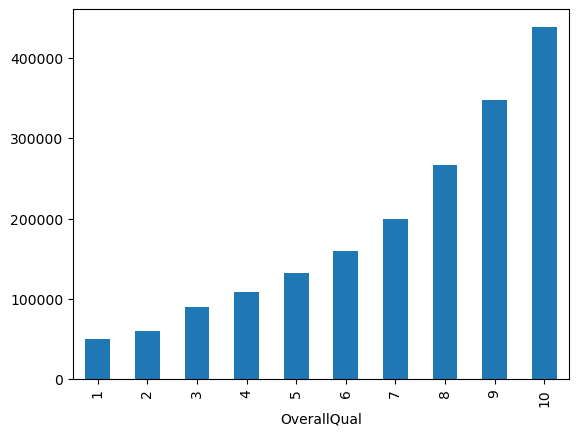

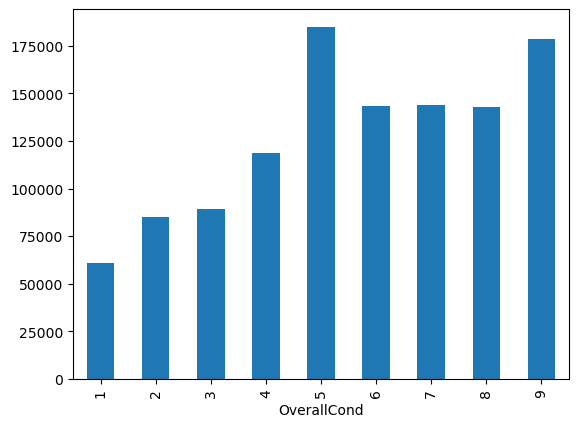

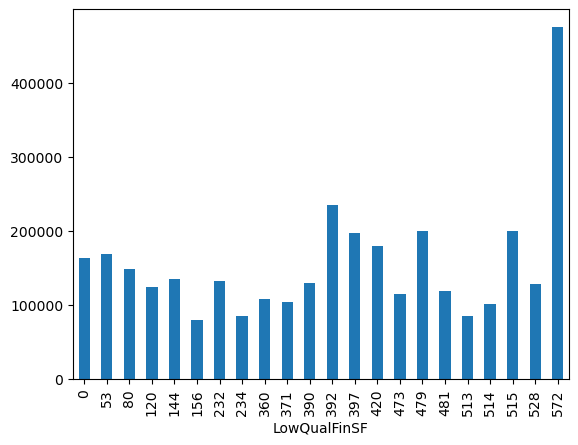

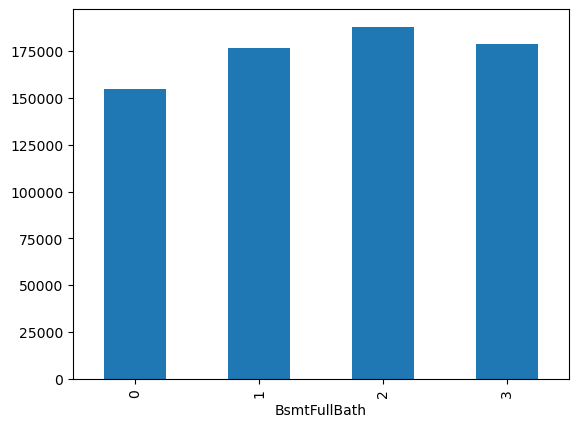

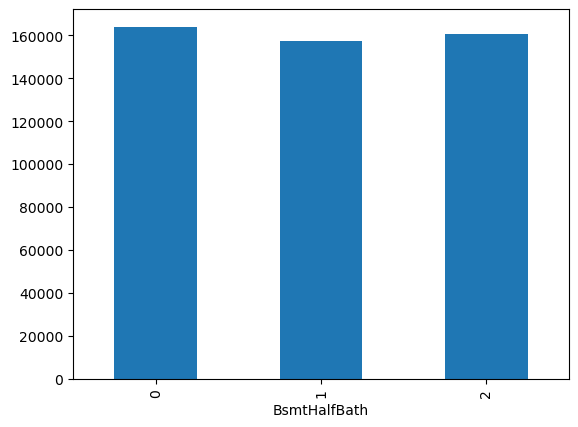

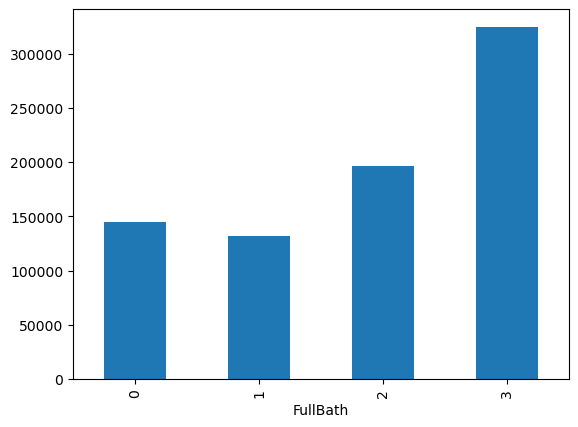

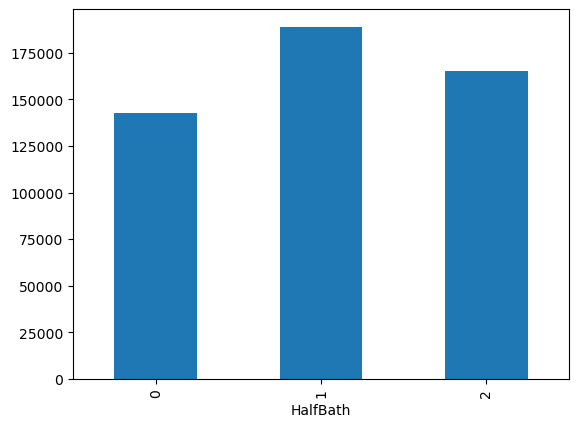

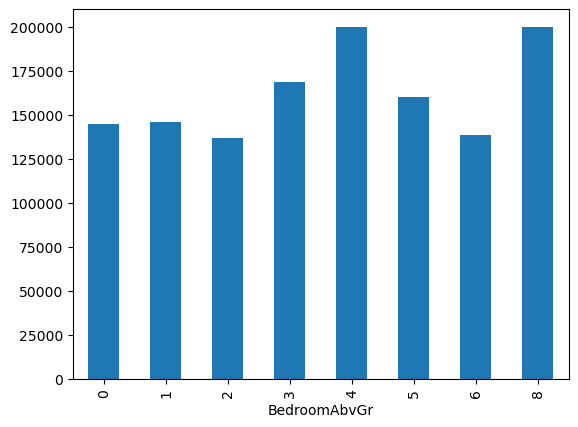

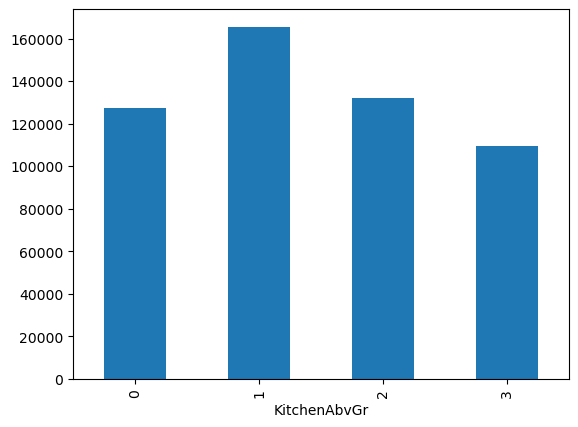

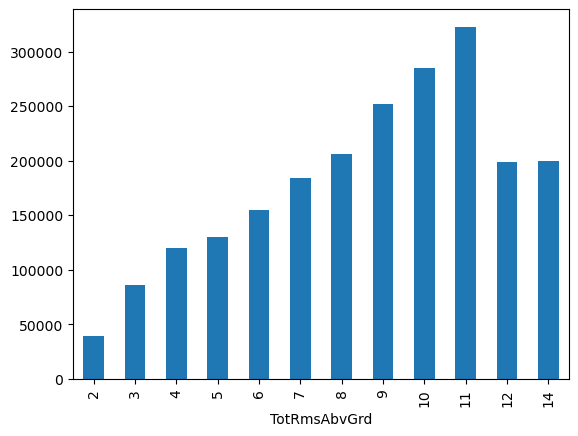

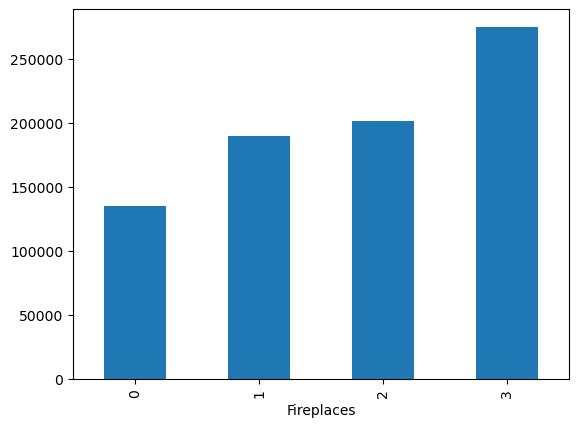

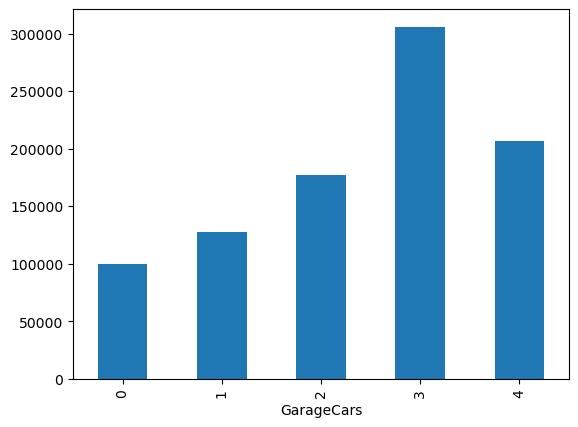

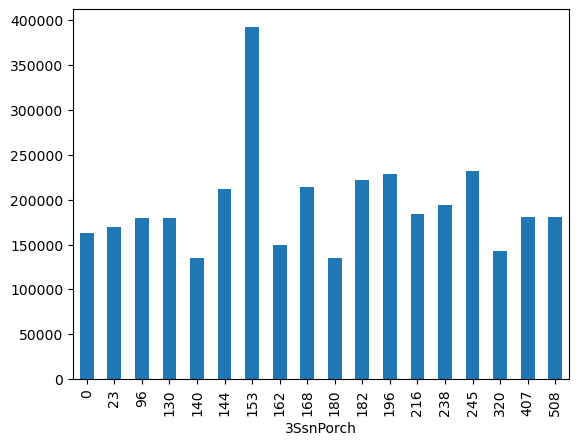

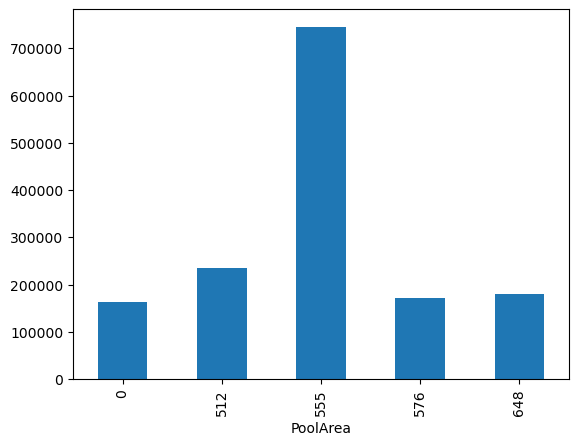

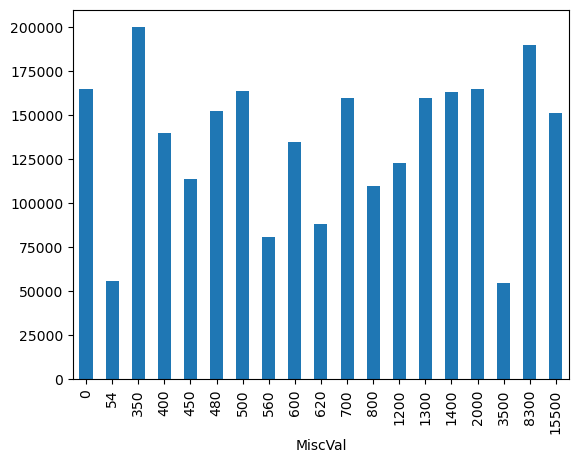

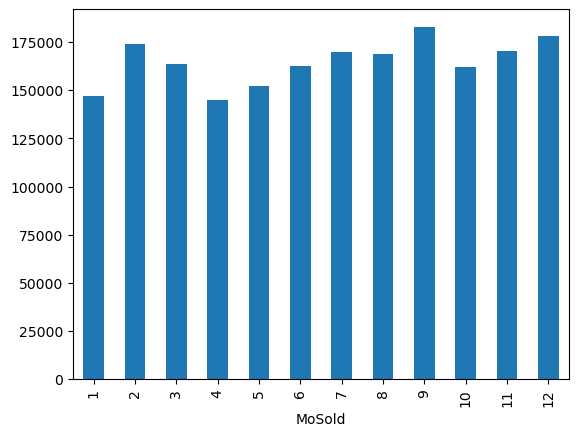

In [13]:
for col in discrete_cols:
    df.groupby(col)['SalePrice'].median().plot.bar()
    plt.show()

'overall' and 'FullBath' has a monotonic relationship with the dependent variale(saleprice)

In [14]:
continous_col=[col for col in numerical_cols if col not in discrete_cols+['Id']+Year_cols]
print(len(continous_col))
continous_col

16


['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

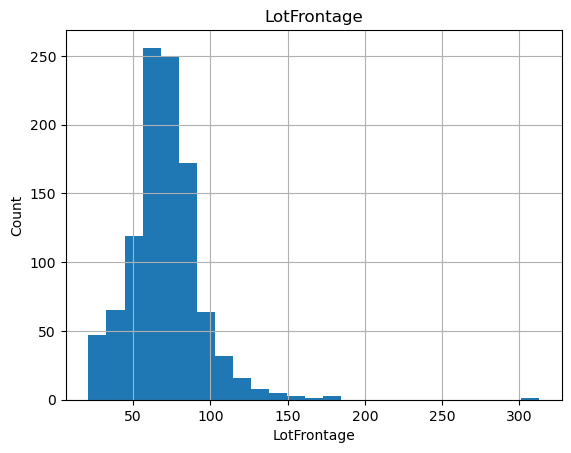

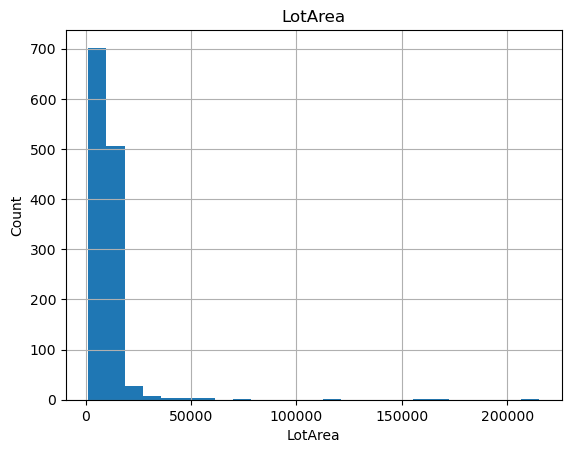

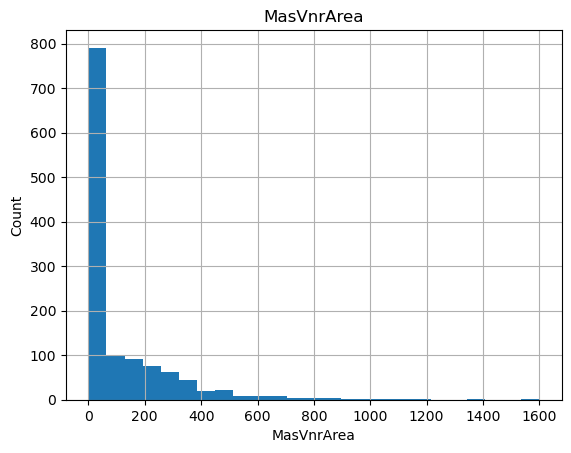

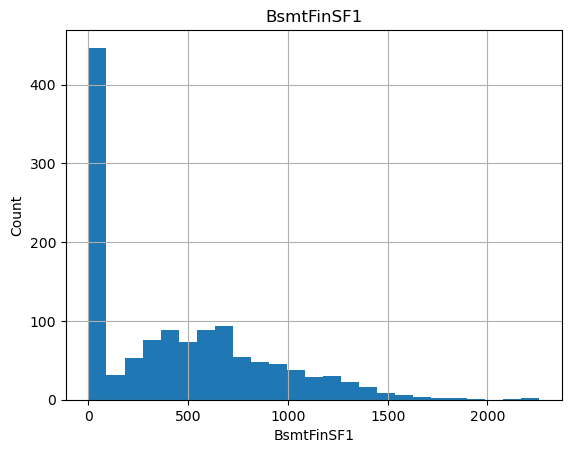

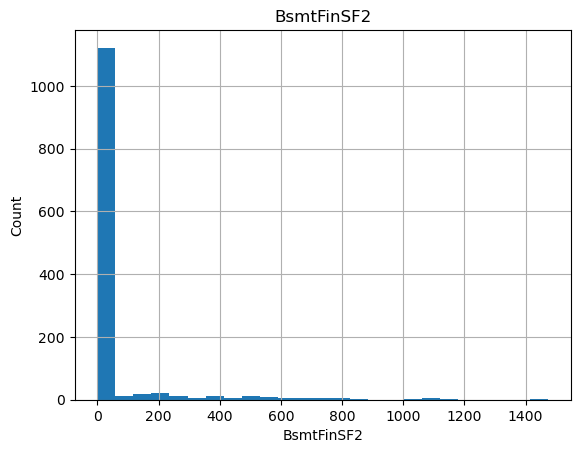

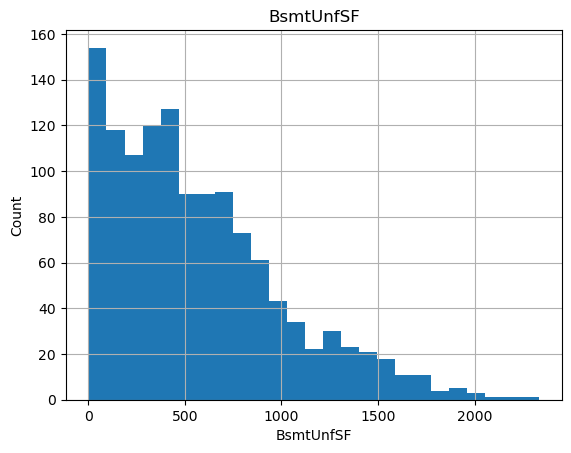

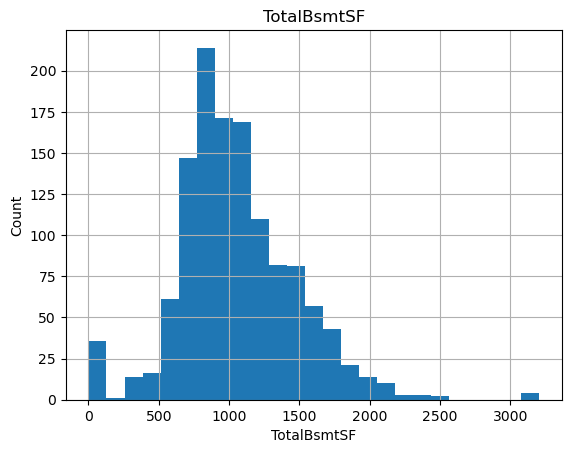

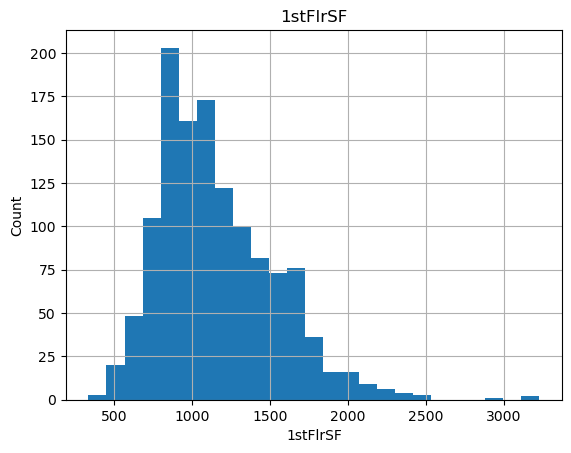

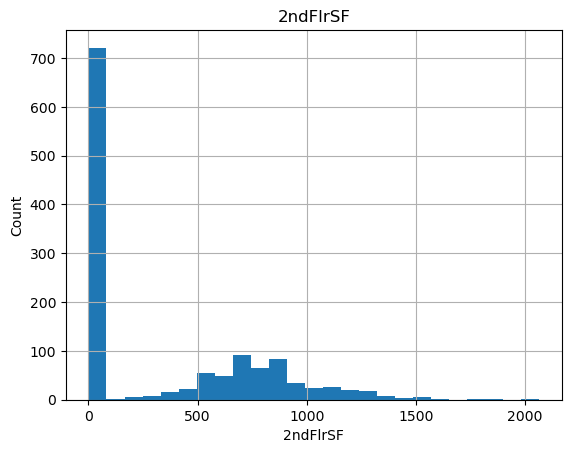

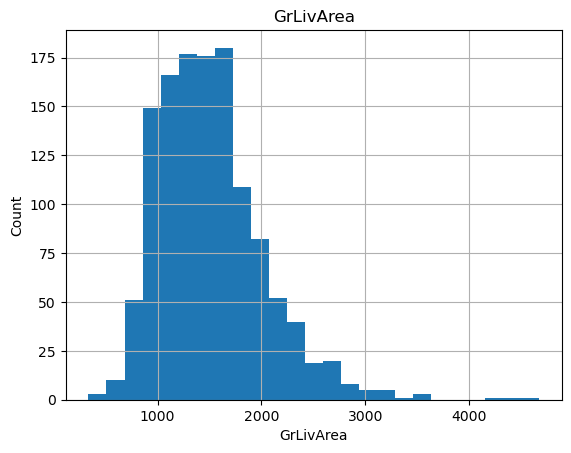

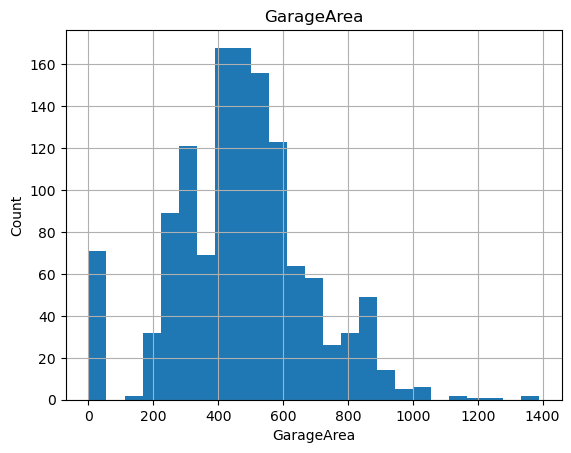

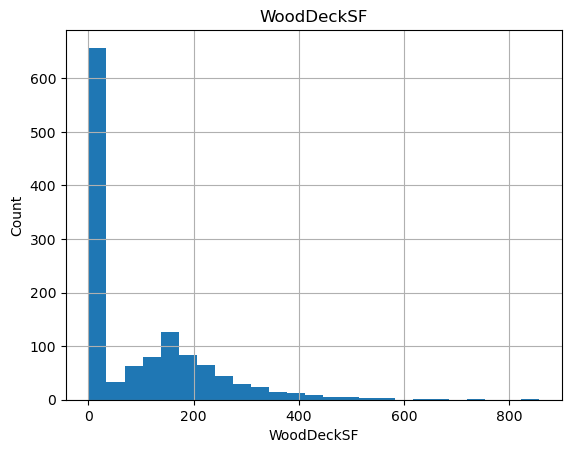

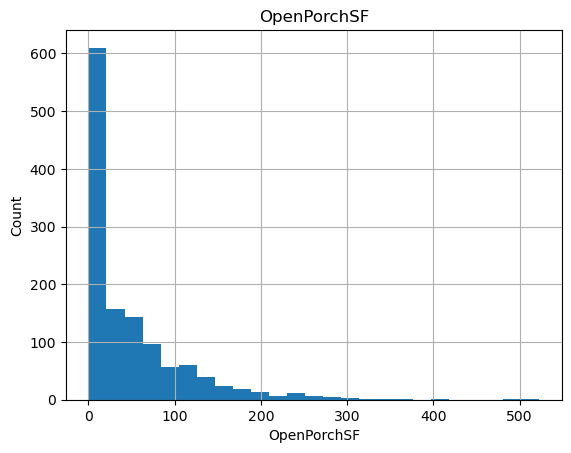

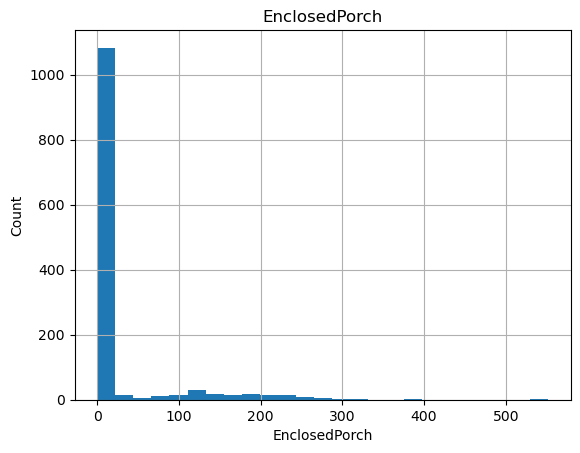

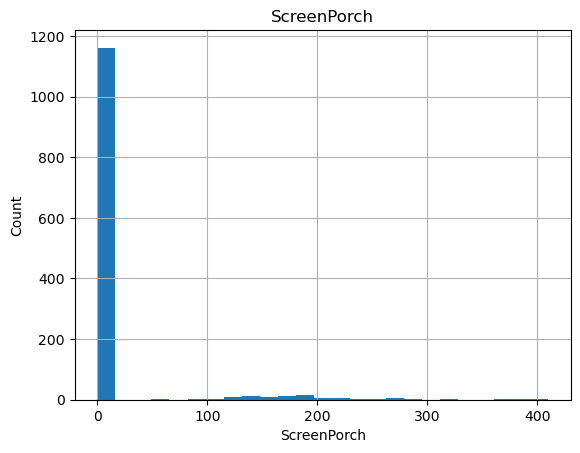

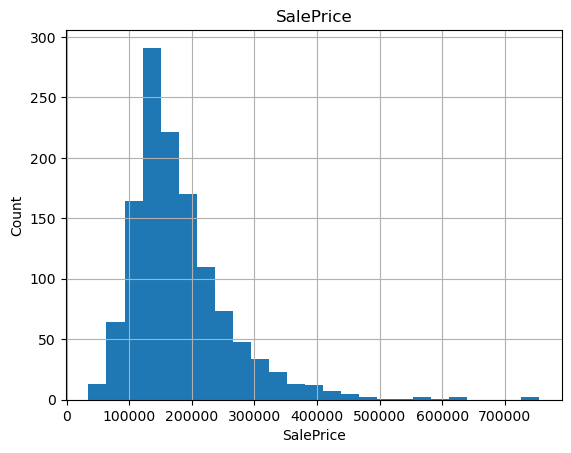

In [15]:
for col in continous_col:
    df[col].hist(bins=25)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


In EDA we convert these distributions into a gaussian or normal distribution to enhance our model

# EDA part 2

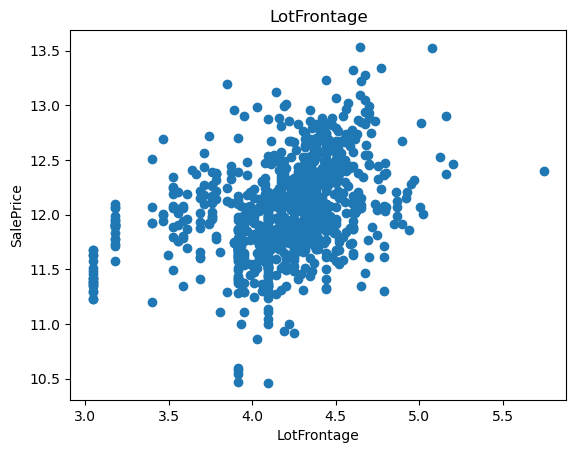

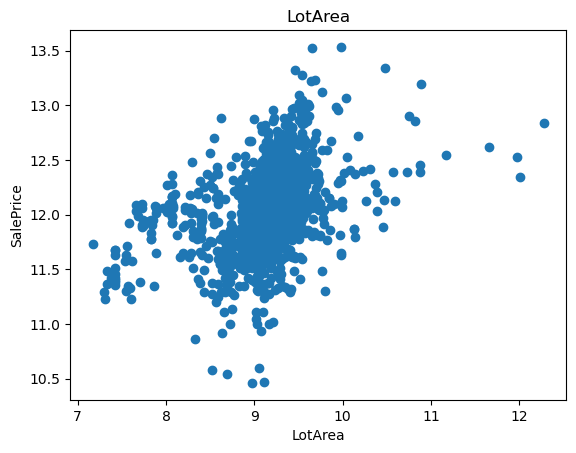

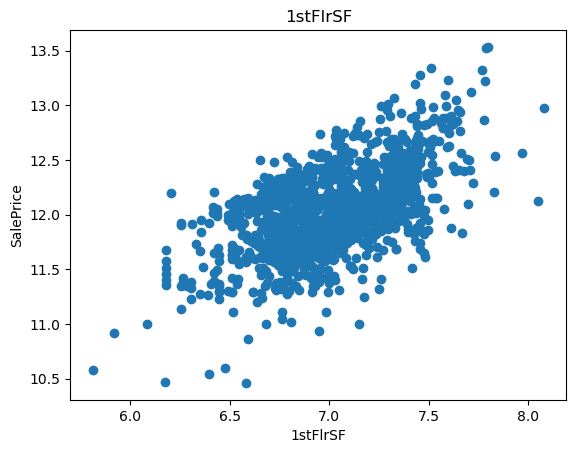

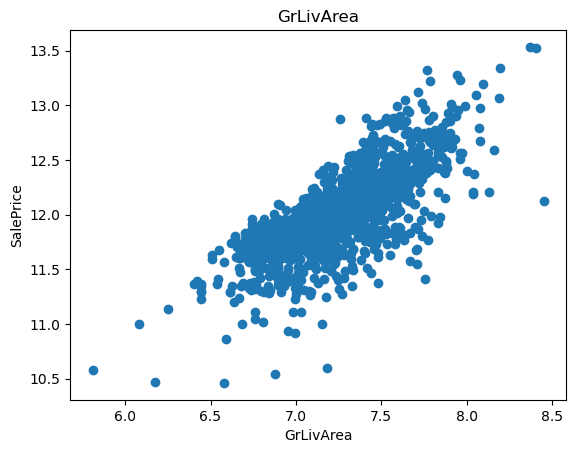

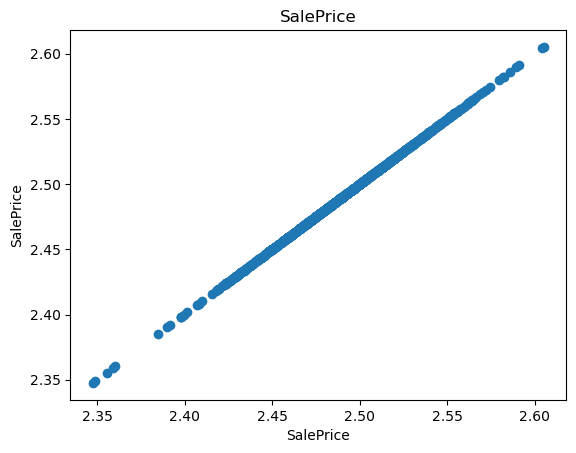

In [16]:
#logarithmic transformation into normal distribution

for col in continous_col:
    data=df.copy()
    if 0 in data[col].unique():
        pass
    else:
        data[col]=np.log(data[col])
        data['SalePrice']=np.log(data['SalePrice'])
        plt.scatter(data[col],data['SalePrice'])
        plt.xlabel(col)
        plt.ylabel('SalePrice')
        plt.title(col)
        plt.show()

the above plots shows that there is a positive relationship between contious variables and Salesprice (dependent variable)

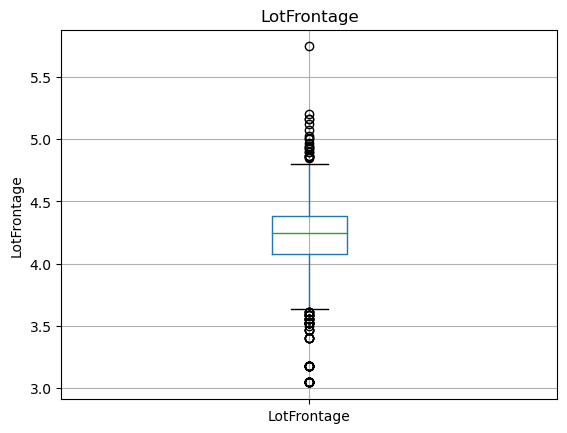

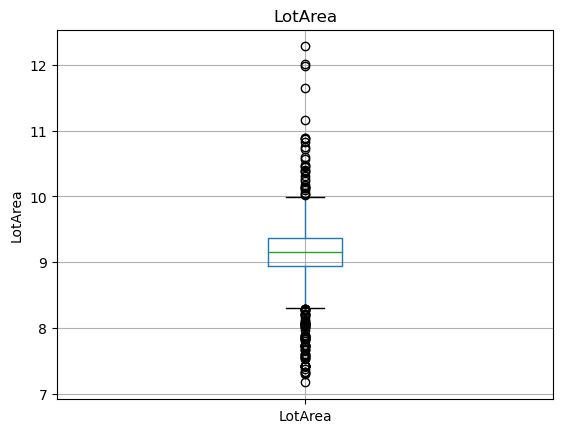

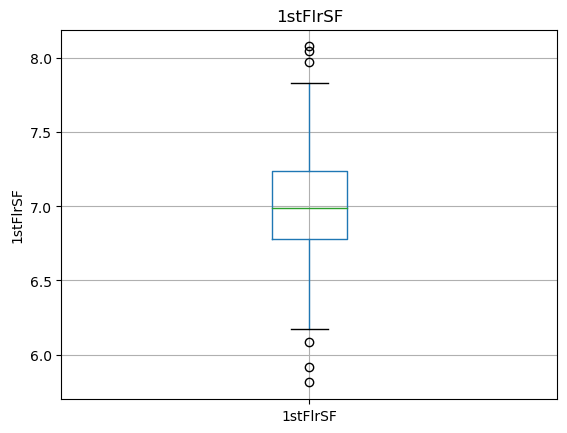

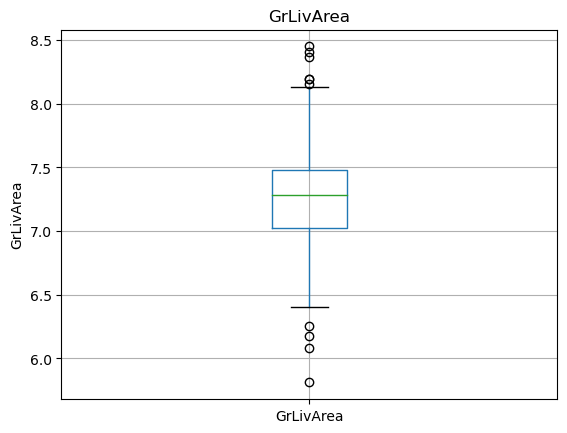

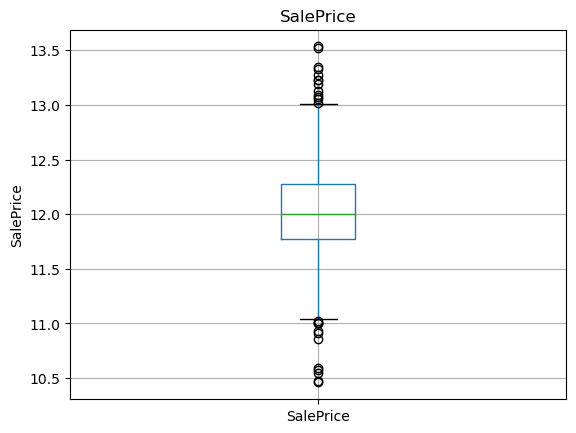

In [17]:
# checking for outliers

for col in continous_col:
    data=df.copy()
    if 0 in data[col].unique():
        pass
    else:
        data[col]=np.log(data[col])
        data.boxplot(col)
        plt.ylabel(col)
        plt.title(col)
        plt.show()

In [18]:
## Categorical Variables

categorical_col=[col for col in df.columns if col not in numerical_cols]
categorical_col

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [19]:
for col in categorical_col:
    print('The col_name is {} and the numer of categories are {}'.format(col,len(df[col].unique())))

The col_name is MSZoning and the numer of categories are 5
The col_name is Street and the numer of categories are 2
The col_name is Alley and the numer of categories are 3
The col_name is LotShape and the numer of categories are 4
The col_name is LandContour and the numer of categories are 4
The col_name is Utilities and the numer of categories are 2
The col_name is LotConfig and the numer of categories are 5
The col_name is LandSlope and the numer of categories are 3
The col_name is Neighborhood and the numer of categories are 25
The col_name is Condition1 and the numer of categories are 9
The col_name is Condition2 and the numer of categories are 8
The col_name is BldgType and the numer of categories are 5
The col_name is HouseStyle and the numer of categories are 8
The col_name is RoofStyle and the numer of categories are 6
The col_name is RoofMatl and the numer of categories are 6
The col_name is Exterior1st and the numer of categories are 14
The col_name is Exterior2nd and the num

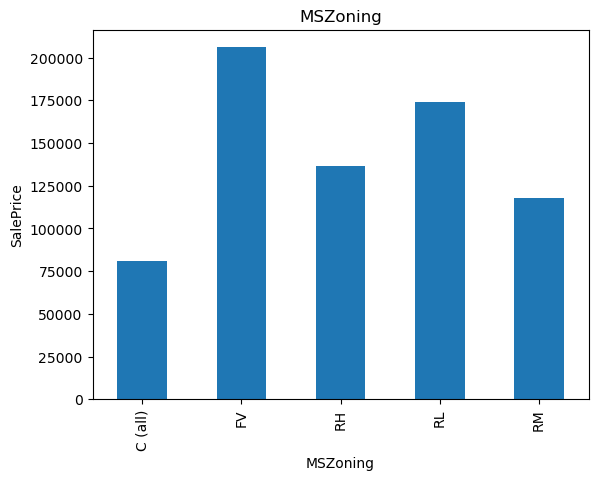

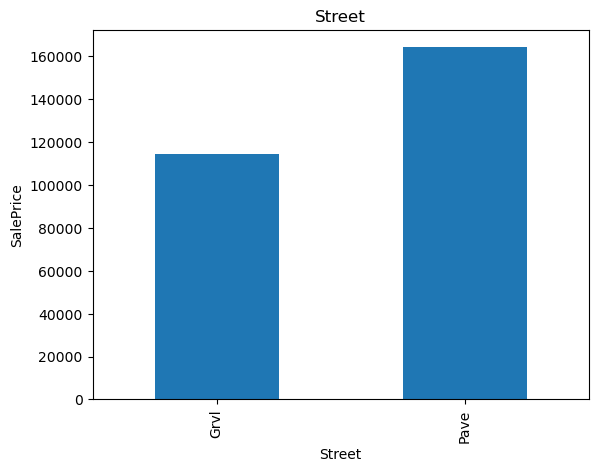

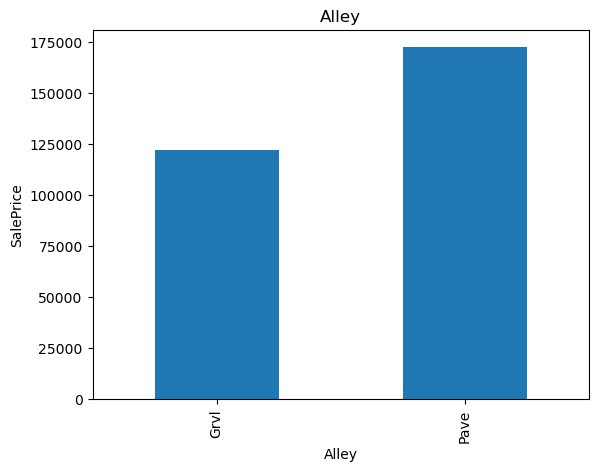

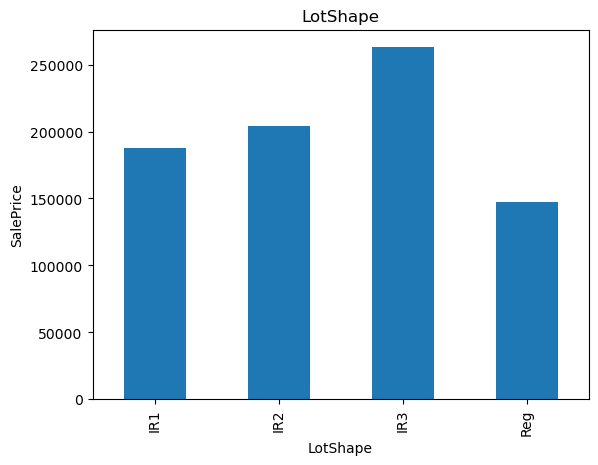

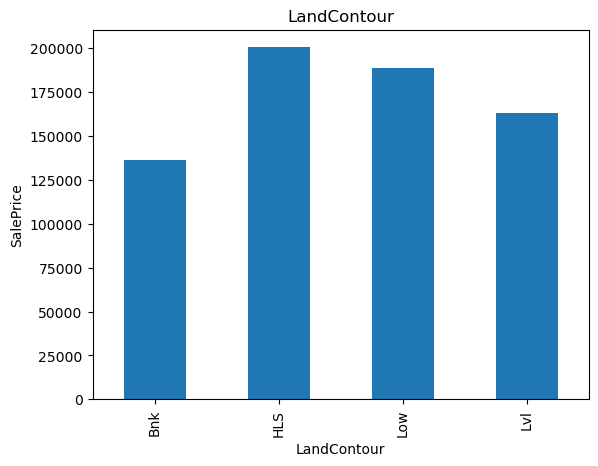

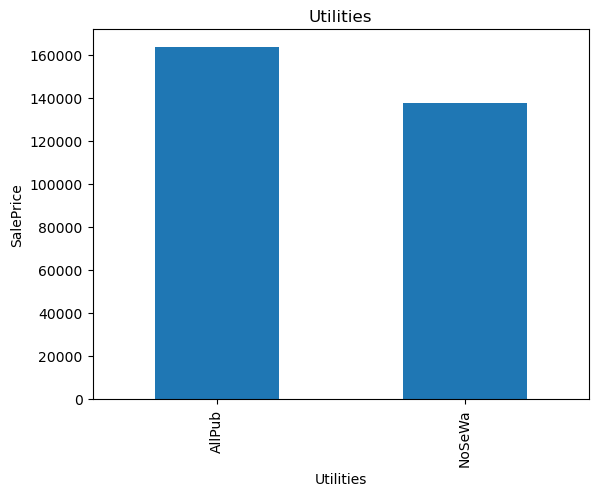

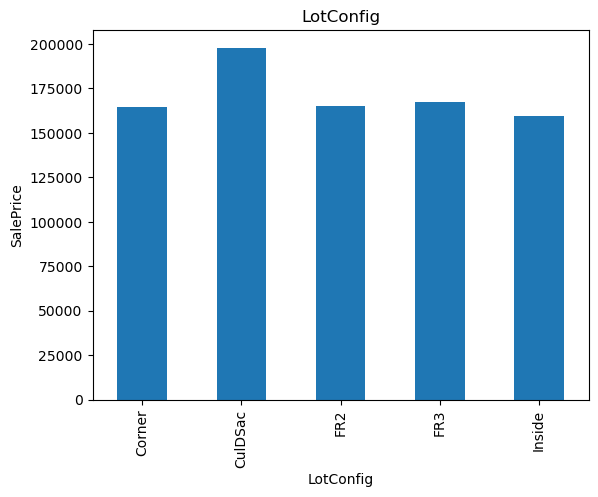

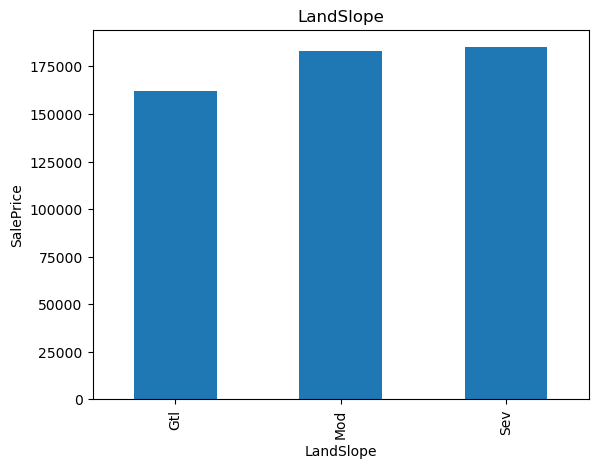

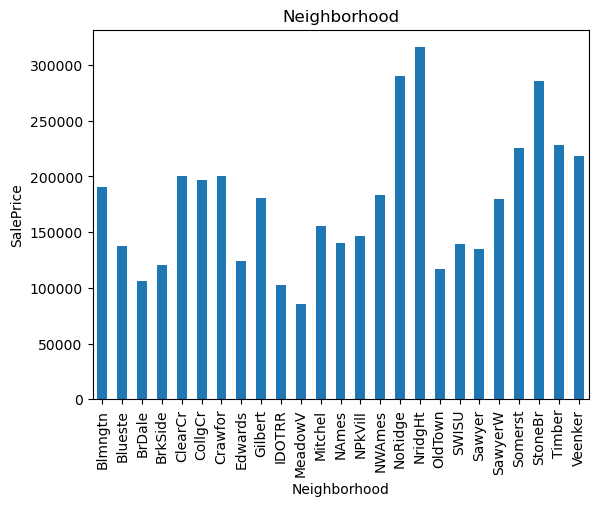

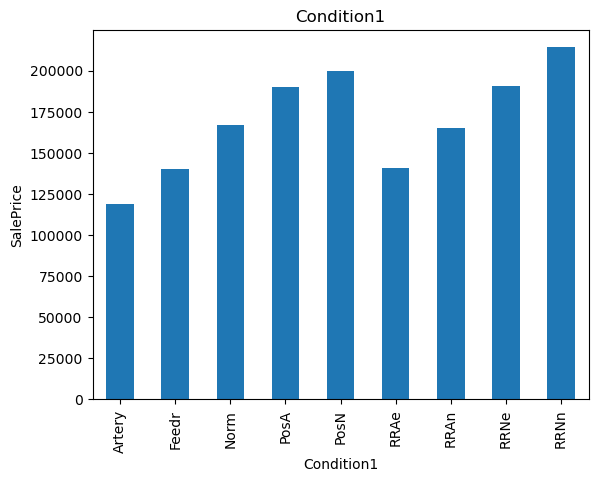

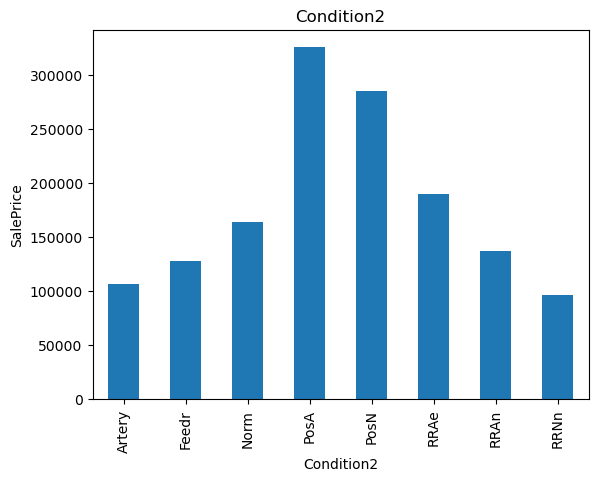

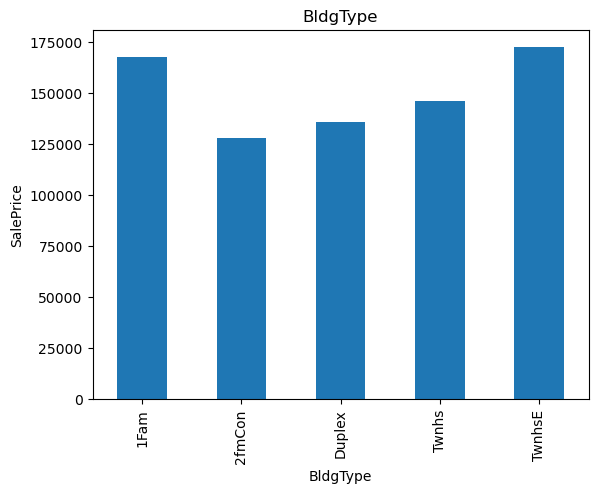

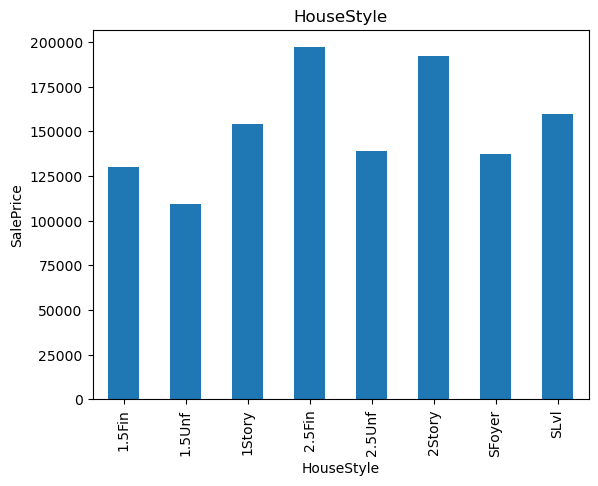

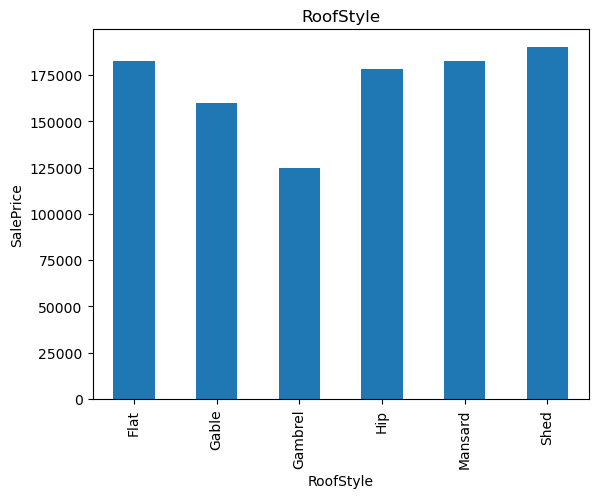

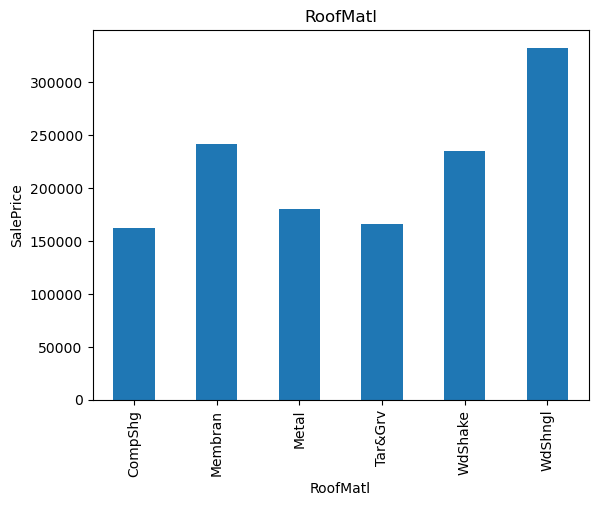

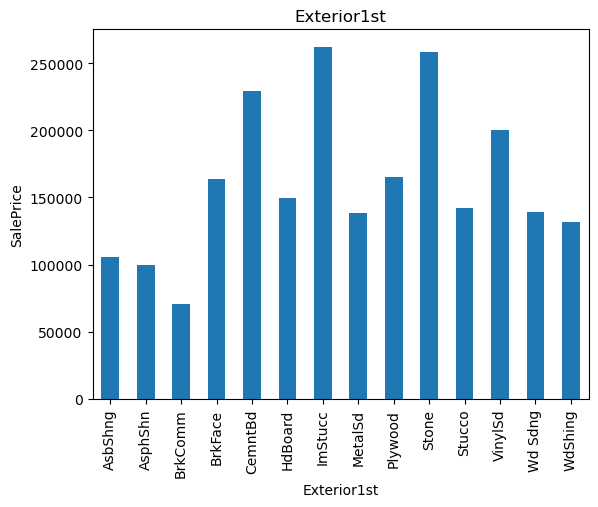

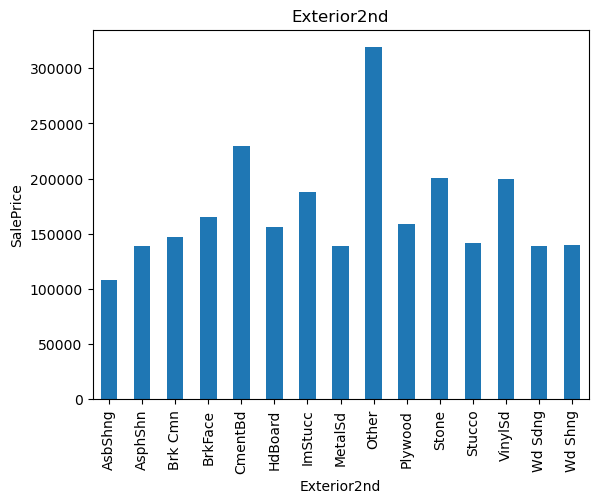

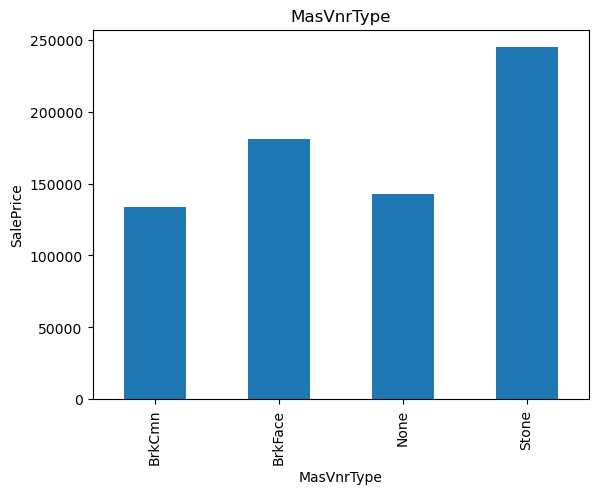

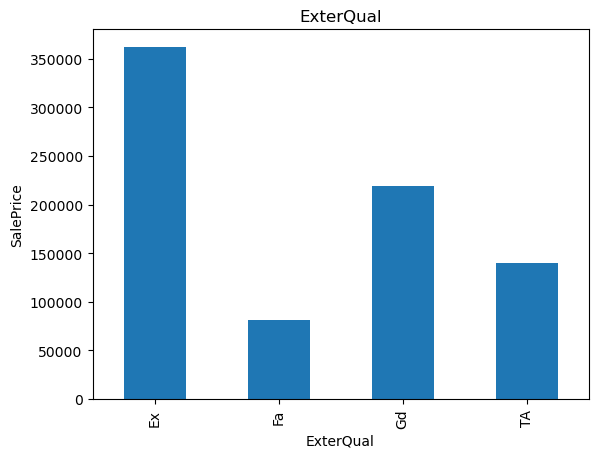

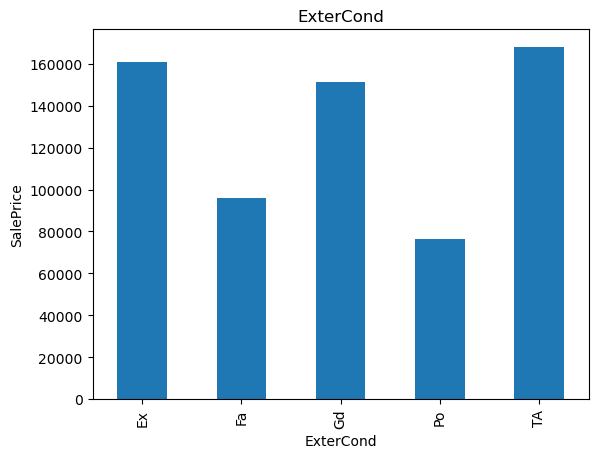

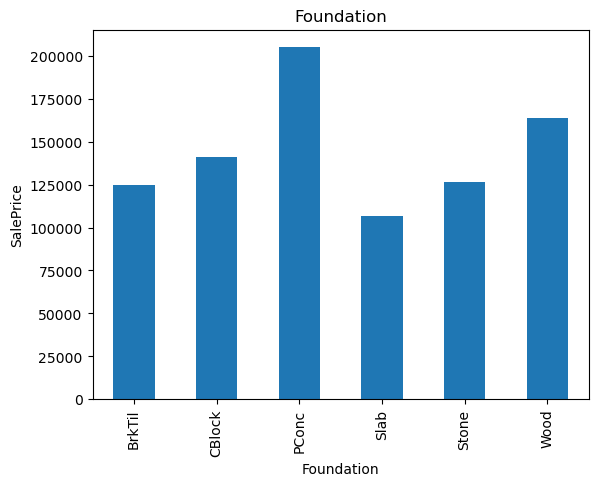

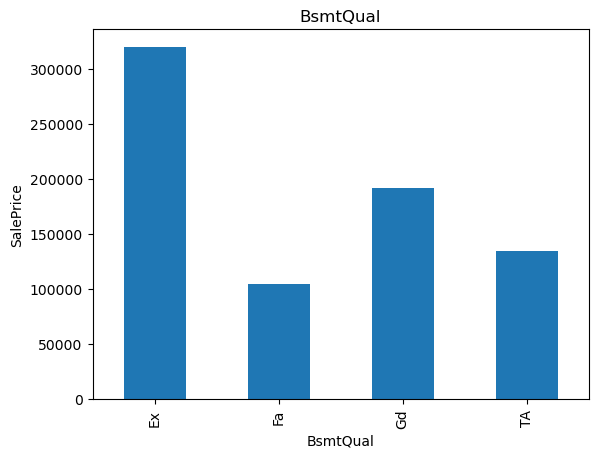

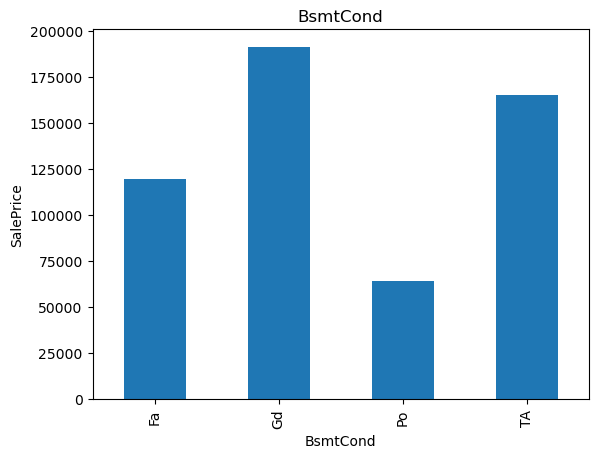

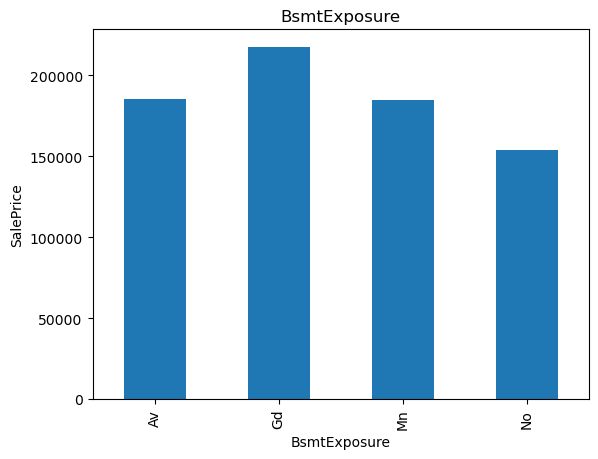

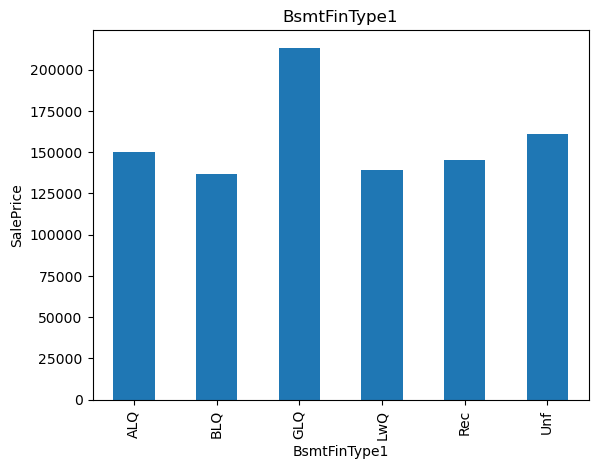

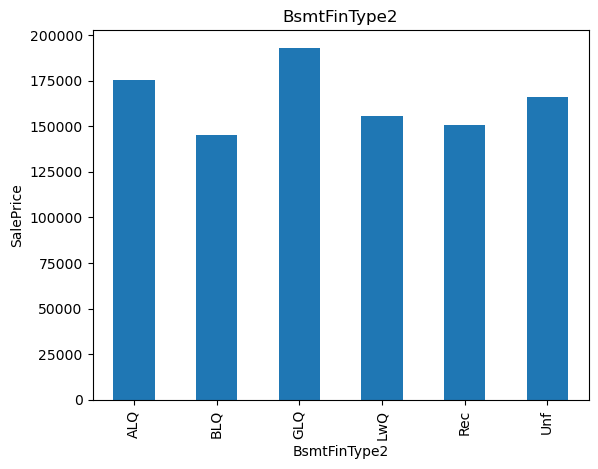

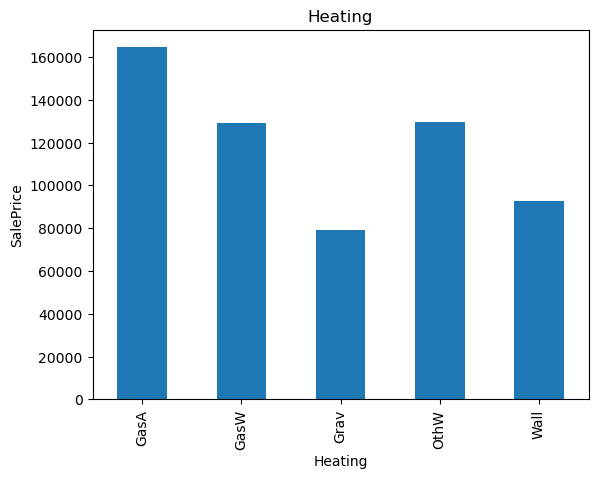

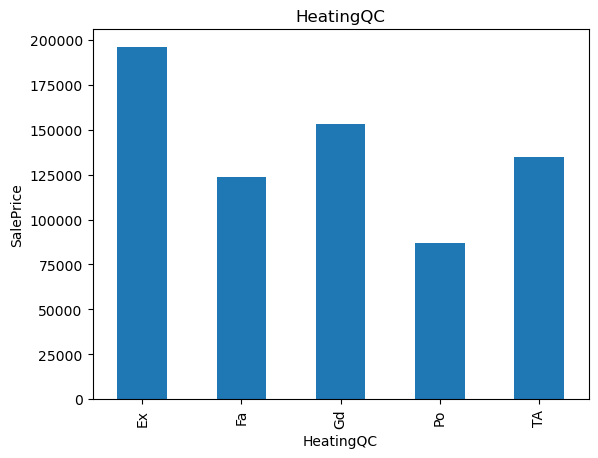

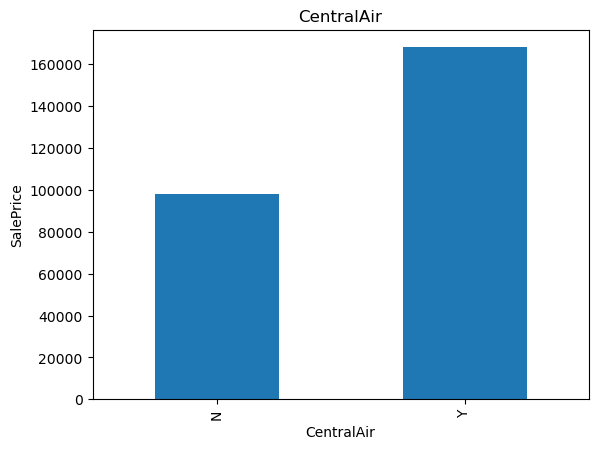

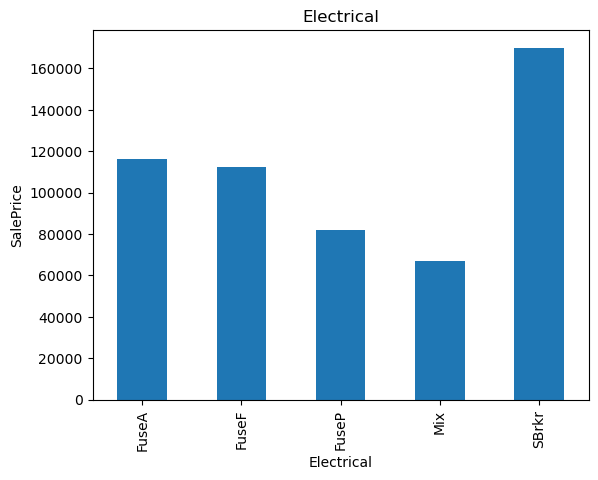

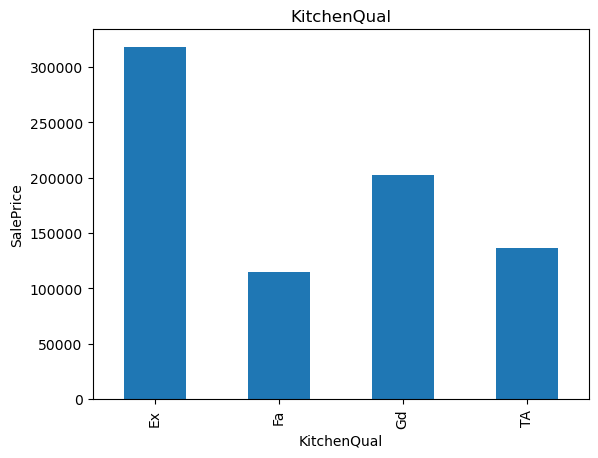

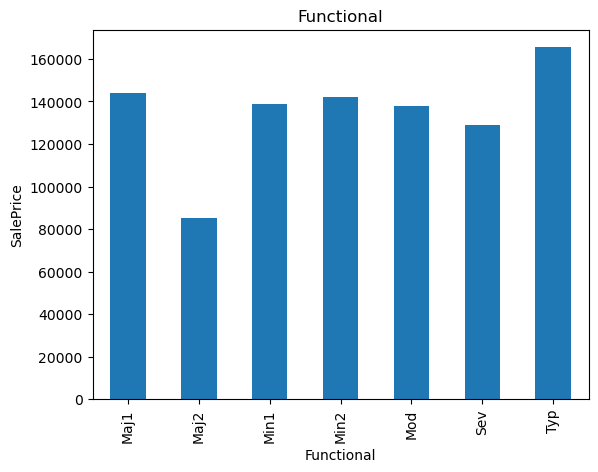

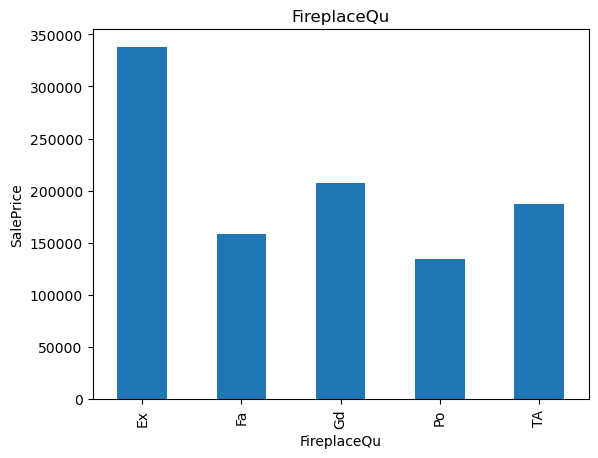

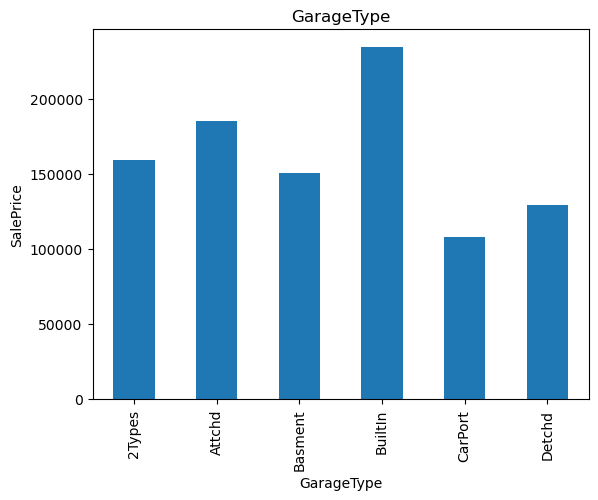

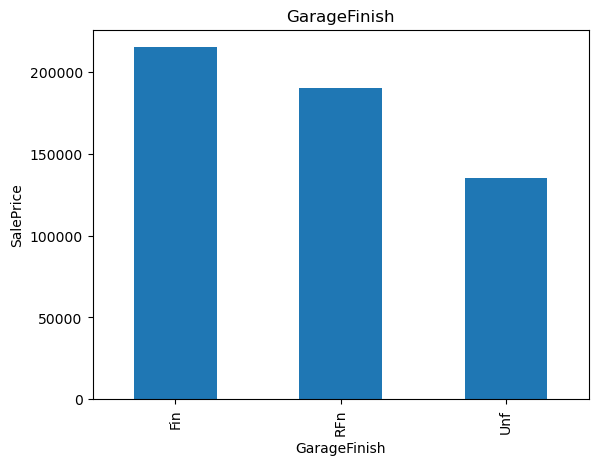

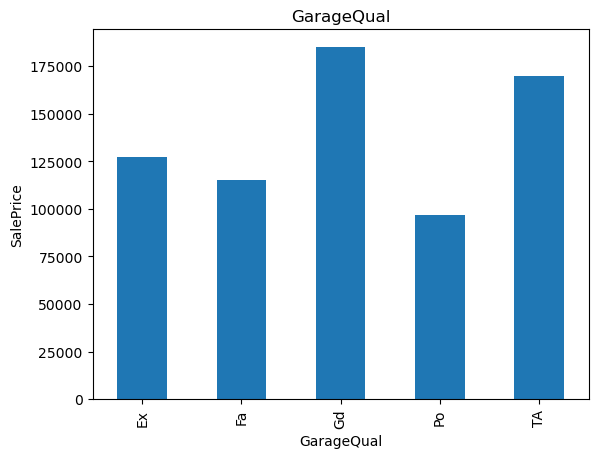

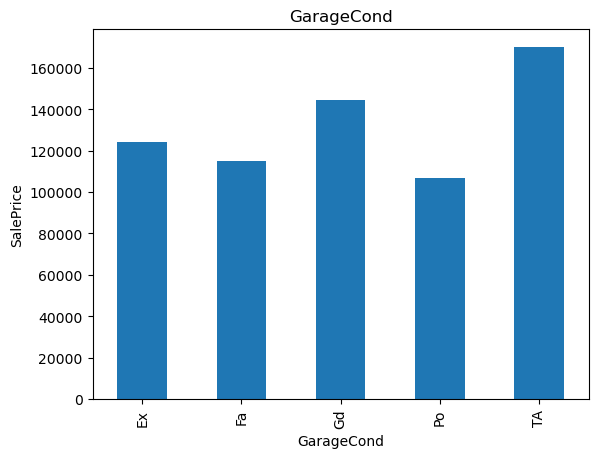

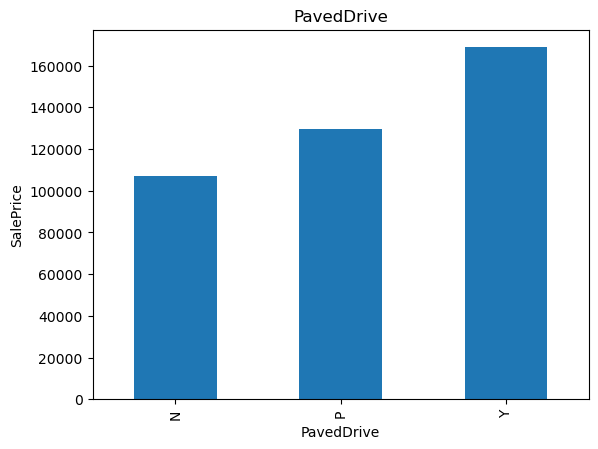

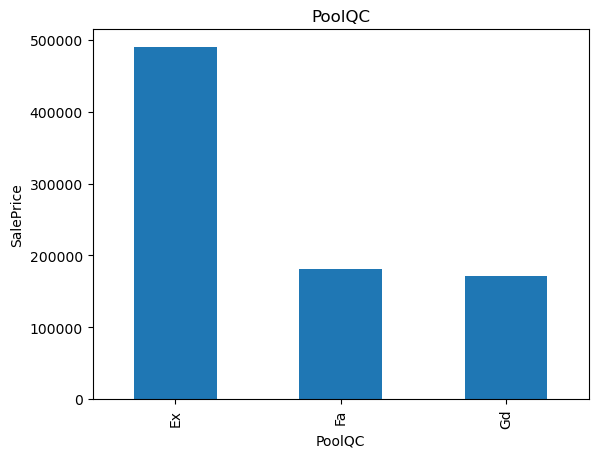

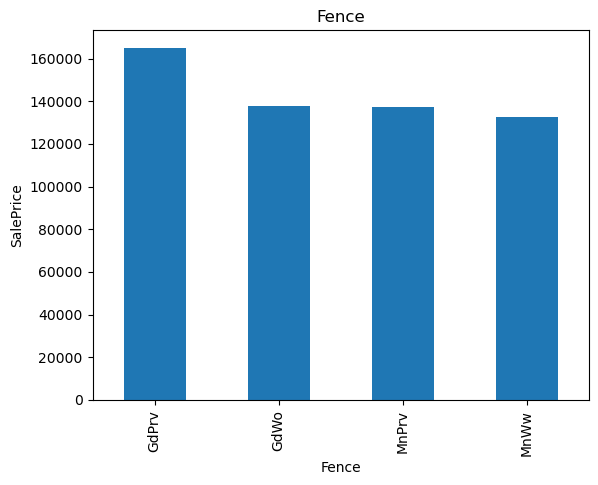

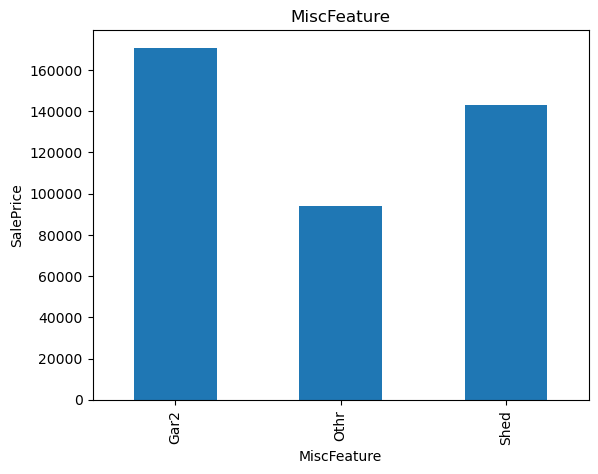

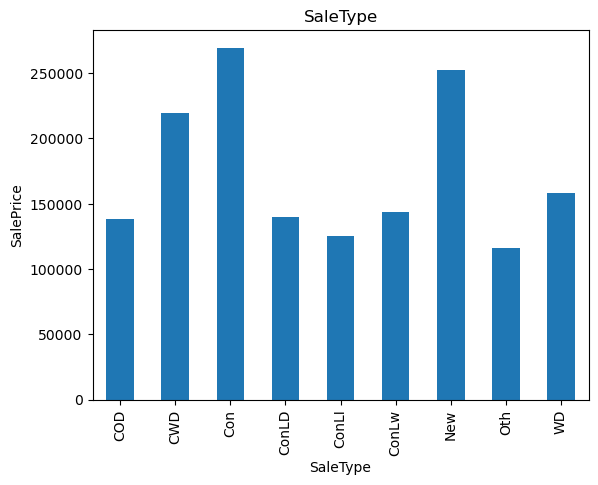

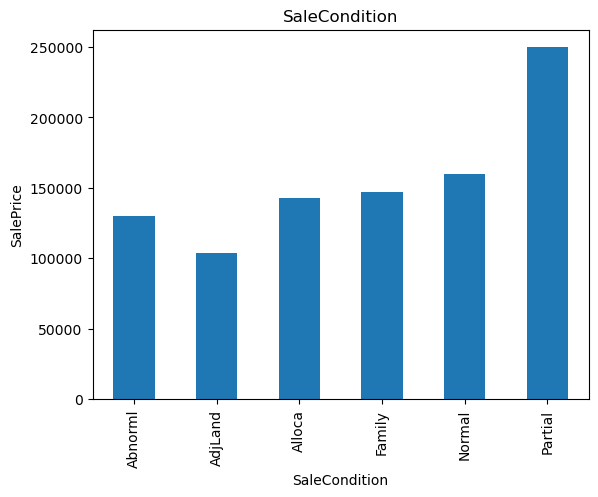

In [20]:
for col in categorical_col:
    df.groupby(col)['SalePrice'].median().plot.bar()
    plt.xlabel(col)
    plt.ylabel('SalePrice')
    plt.title(col)
    plt.show()

In [21]:
#Missing Values in Categorical variables
cat_nan=[col for col in categorical_col if df[col].isnull().sum()>1]
 
for col in cat_nan:
    print('{}:{}% missing value'.format(col,np.round(df[col].isnull().mean(),4)))

Alley:0.9396% missing value
MasVnrType:0.0056% missing value
BsmtQual:0.0278% missing value
BsmtCond:0.0278% missing value
BsmtExposure:0.0286% missing value
BsmtFinType1:0.0278% missing value
BsmtFinType2:0.0286% missing value
FireplaceQu:0.4758% missing value
GarageType:0.0564% missing value
GarageFinish:0.0564% missing value
GarageQual:0.0564% missing value
GarageCond:0.0564% missing value
PoolQC:0.9968% missing value
Fence:0.8094% missing value
MiscFeature:0.9595% missing value


In [22]:
# replacing missing categorical features

def replace_cat_nan(df,cat_nan):
    data=df.copy()
    data[cat_nan]=data[cat_nan].fillna('Missing')
    return data

In [23]:
df=replace_cat_nan(df,cat_nan)
df[cat_nan].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [24]:
# from ox plot, numerical features has  lot of outliers, therefore we replace the nan values in numerical features with median or mode (dont use mean, because the new values will be determined by outliers which is bad)
numerical_nan= [col for col in numerical_cols if df[col].isnull().sum()>1]

for col in numerical_nan:
    median_val=df[col].median()
    df[col+'nan']=np.where(df[col].isnull(),1,0)
    df[col].fillna(median_val,inplace=True)

df[numerical_nan].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [25]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500,0,0,0
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500,0,0,0
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500,0,0,0
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000,0,0,0
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000,0,0,0


In [26]:
#for year features we find dureation i.e. year sold - year done
yr_col=[col for col in Year_cols if col!='YrSold']

for col in yr_col:
    df[col]=df['YrSold']- df[col]
    
df[yr_col].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
0,5,5,5.0
1,31,31,31.0
2,7,6,7.0
3,91,36,8.0
4,8,8,8.0


In [27]:
df[['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,5,5,5.0,2008
1,31,31,31.0,2007
2,7,6,7.0,2008
3,91,36,8.0,2006
4,8,8,8.0,2008


In [28]:
num_col=['LotFrontage','LotArea','1stFlrSF','GrLivArea','SalePrice']

for x in num_col:
    if 0 in df[x].unique():
        pass
    else:
        df[x]=np.log(df[x])

In [29]:
df[numerical_cols].head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,4.174387,9.041922,7,5,5,5,196.0,706,0,150,856,6.752270,854,0,7.444249,1,0,2,1,3,1,8,0,5.0,2,548,0,61,0,0,0,0,0,2,2008,12.247694
1,2,20,4.382027,9.169518,6,8,31,31,0.0,978,0,284,1262,7.140453,0,0,7.140453,0,1,2,0,3,1,6,1,31.0,2,460,298,0,0,0,0,0,0,5,2007,12.109011
2,3,60,4.219508,9.328123,7,5,7,6,162.0,486,0,434,920,6.824374,866,0,7.487734,1,0,2,1,3,1,6,1,7.0,2,608,0,42,0,0,0,0,0,9,2008,12.317167
3,4,70,4.094345,9.164296,7,5,91,36,0.0,216,0,540,756,6.867974,756,0,7.448334,1,0,1,0,3,1,7,1,8.0,3,642,0,35,272,0,0,0,0,2,2006,11.849398
4,5,60,4.430817,9.565214,8,5,8,8,350.0,655,0,490,1145,7.043160,1053,0,7.695303,1,0,2,1,4,1,9,1,8.0,3,836,192,84,0,0,0,0,0,12,2008,12.429216


# Handling Rare Categorical Feature

here we will remove categorical variables which are less than 1% presentm in the column

In [30]:
for col in categorical_col:
    x=df.groupby(col)['SalePrice'].count()/len(df)
    xy=x[x>0.01].index
    df[col]=np.where(df[col].isin(xy),df[col],'Rare_var')

In [31]:
df[ categorical_col].head(20)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Missing,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal
1,RL,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Rare_var,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal
2,RL,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal
3,RL,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,Missing,Missing,Missing,WD,Abnorml
4,RL,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal
5,RL,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,Rare_var,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Missing,Attchd,Unf,TA,TA,Y,Missing,MnPrv,Shed,WD,Normal
6,RL,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,Stone,Gd,TA,PConc,Ex,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal
7,RL,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,Gable,CompShg,HdBoard,HdBoard,Stone,TA,TA,CBlock,Gd,TA,Mn,ALQ,BLQ,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,Missing,Missing,Shed,WD,Normal
8,RM,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,Gable,CompShg,BrkFace,Wd Shng,None,TA,TA,BrkTil,TA,TA,No,Unf,Unf,GasA,Gd,Y,FuseF,TA,Min1,TA,Detchd,Unf,Fa,TA,Y,Missing,Missing,Missing,WD,Abnorml
9,RL,Pave,Missing,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Rare_var,2fmCon,1.5Unf,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,BrkTil,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,Rare_var,TA,Y,Missing,Missing,Missing,WD,Normal


In [32]:
df.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,4.174387,9.041922,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,6.752270,854,0,7.444249,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,12.247694,0,0,0
1,2,20,RL,4.382027,9.169518,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Rare_var,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,7.140453,0,0,7.140453,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,12.109011,0,0,0
2,3,60,RL,4.219508,9.328123,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,6.824374,866,0,7.487734,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,12.317167,0,0,0
3,4,70,RL,4.094345,9.164296,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,6.867974,756,0,7.448334,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,11.849398,0,0,0
4,5,60,RL,4.430817,9.565214,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,7.043160,1053,0,7.695303,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,12.429216,0,0,0
5,6,50,RL,4.442651,9.554993,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,16,14,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Rare_var,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,6.679599,566,0,7.216709,1,0,1,1,1,1,TA,5,Typ,0,Missing,Attchd,16.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,Missing,MnPrv,Shed,700,10,2009,WD,Normal,11.870600,0,0,0
6,7,20,RL,4.317488,9.218705,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,3,2,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,7.434848,0,0,7.434848,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,3.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,Missing,Missing,Missing,0,8,2007,WD,Normal,12.634603,0,0,0
7,8,60,RL,4.248495,9.247829,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,36,36,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,7.009409,983,0,7.644919,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,36.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,Missing,Missing,Shed,350,11,2009,WD,Normal,12.206073,1,0,0
8,9,50,RM,3.931826,8.719317,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,77,58,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,6.

In [33]:
for col in categorical_col:
    x=np.sort(df[col].unique())
    dict1={k:v for v, k in enumerate(x,1)}
    df[col]=df[col].map(dict1)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,3,4.174387,9.041922,1,2,4,4,1,4,1,5,3,1,1,4,7,5,5,5,1,1,9,9,2,196.0,2,4,3,3,5,5,3,706,7,0,150,856,1,1,2,4,6.752270,854,0,7.444249,1,0,2,1,3,1,3,8,6,0,4,1,5.0,3,2,548,4,4,3,0,61,0,0,0,0,1,3,1,0,2,2008,4,3,12.247694,0,0,0
1,2,20,3,4.382027,9.169518,1,2,4,4,1,3,1,17,2,1,1,3,6,8,31,31,1,1,5,5,3,0.0,4,4,2,3,5,2,1,978,7,0,284,1262,1,1,2,4,7.140453,0,0,7.140453,0,1,2,0,3,1,4,6,6,1,6,1,31.0,3,2,460,4,4,3,298,0,0,0,0,0,1,3,1,0,5,2007,4,3,12.109011,0,0,0
2,3,60,3,4.219508,9.328123,1,2,1,4,1,4,1,5,3,1,1,4,7,5,7,6,1,1,9,9,2,162.0,2,4,3,3,5,4,3,486,7,0,434,920,1,1,2,4,6.824374,866,0,7.487734,1,0,2,1,3,1,3,6,6,1,6,1,7.0,3,2,608,4,4,3,0,42,0,0,0,0,1,3,1,0,9,2008,4,3,12.317167,0,0,0
3,4,70,3,4.094345,9.164296,1,2,1,4,1,1,1,6,3,1,1,4,7,5,91,36,1,1,10,11,3,0.0,4,4,1,5,2,5,1,216,7,0,540,756,1,3,2,4,6.867974,756,0,7.448334,1,0,1,0,3,1,3,7,6,1,3,4,8.0,4,3,642,4,4,3,0,35,272,0,0,0,1,3,1,0,2,2006,4,1,11.849398,0,0,0
4,5,60,3,4.430817,9.565214,1,2,1,4,1,3,1,14,3,1,1,4,8,5,8,8,1,1,9,9,2,350.0,2,4,3,3,5,1,3,655,7,0,490,1145,1,1,2,4,7.043160,1053,0,7.695303,1,0,2,1,4,1,3,9,6,1,6,1,8.0,3,3,836,4,4,3,192,84,0,0,0,0,1,3,1,0,12,2008,4,3,12.429216,0,0,0


In [34]:
df.drop('Id',axis=1,inplace=True)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,60,3,4.174387,9.041922,1,2,4,4,1,4,1,5,3,1,1,4,7,5,5,5,1,1,9,9,2,196.0,2,4,3,3,5,5,3,706,7,0,150,856,1,1,2,4,6.752270,854,0,7.444249,1,0,2,1,3,1,3,8,6,0,4,1,5.0,3,2,548,4,4,3,0,61,0,0,0,0,1,3,1,0,2,2008,4,3,12.247694,0,0,0
1,20,3,4.382027,9.169518,1,2,4,4,1,3,1,17,2,1,1,3,6,8,31,31,1,1,5,5,3,0.0,4,4,2,3,5,2,1,978,7,0,284,1262,1,1,2,4,7.140453,0,0,7.140453,0,1,2,0,3,1,4,6,6,1,6,1,31.0,3,2,460,4,4,3,298,0,0,0,0,0,1,3,1,0,5,2007,4,3,12.109011,0,0,0
2,60,3,4.219508,9.328123,1,2,1,4,1,4,1,5,3,1,1,4,7,5,7,6,1,1,9,9,2,162.0,2,4,3,3,5,4,3,486,7,0,434,920,1,1,2,4,6.824374,866,0,7.487734,1,0,2,1,3,1,3,6,6,1,6,1,7.0,3,2,608,4,4,3,0,42,0,0,0,0,1,3,1,0,9,2008,4,3,12.317167,0,0,0
3,70,3,4.094345,9.164296,1,2,1,4,1,1,1,6,3,1,1,4,7,5,91,36,1,1,10,11,3,0.0,4,4,1,5,2,5,1,216,7,0,540,756,1,3,2,4,6.867974,756,0,7.448334,1,0,1,0,3,1,3,7,6,1,3,4,8.0,4,3,642,4,4,3,0,35,272,0,0,0,1,3,1,0,2,2006,4,1,11.849398,0,0,0
4,60,3,4.430817,9.565214,1,2,1,4,1,3,1,14,3,1,1,4,8,5,8,8,1,1,9,9,2,350.0,2,4,3,3,5,1,3,655,7,0,490,1145,1,1,2,4,7.043160,1053,0,7.695303,1,0,2,1,4,1,3,9,6,1,6,1,8.0,3,3,836,4,4,3,192,84,0,0,0,0,1,3,1,0,12,2008,4,3,12.429216,0,0,0


# Feature Scaling

In [35]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
x= df.drop('SalePrice',axis=1)
x_scaled=mms.fit_transform(x)
x_scaled

array([[0.23529412, 0.5       , 0.41820812, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.5       , 0.49506375, ..., 0.        , 0.        ,
        0.        ],
       [0.23529412, 0.5       , 0.434909  , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.5       , 0.54274994, ..., 0.        , 0.        ,
        0.        ],
       [0.05882353, 0.5       , 0.3630441 , ..., 0.        , 0.        ,
        1.        ],
       [0.35294118, 0.5       , 0.38236013, ..., 0.        , 0.        ,
        0.        ]])

In [36]:
df=pd.concat([pd.DataFrame(x_scaled,columns=x.columns),df['SalePrice']], axis=1)

In [37]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,GarageYrBltnan,SalePrice
0,0.235294,0.5,0.418208,0.366344,0.0,0.5,1.0,1.0,0.0,0.75,0.0,0.181818,0.4,0.0,0.0,0.500000,0.666667,0.500,0.037037,0.098361,0.0,0.0,0.8,0.8,0.25,0.12250,0.333333,1.0,0.50,0.5,1.00,1.00,0.333333,0.312389,1.0,0.0,0.064212,0.266999,0.0,0.0,1.0,1.0,0.414873,0.413559,0.0,0.618822,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.0,0.000000,0.6,0.0,0.046729,0.666667,0.50,0.394245,1.0,1.0,1.0,0.000000,0.116635,0.000000,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.090909,0.50,1.0,0.5,0.0,0.0,0.0,12.247694
1,0.000000,0.5,0.495064,0.391317,0.0,0.5,1.0,1.0,0.0,0.50,0.0,0.727273,0.2,0.0,0.0,0.333333,0.555556,0.875,0.229630,0.524590,0.0,0.0,0.4,0.4,0.50,0.00000,1.000000,1.0,0.25,0.5,1.00,0.25,0.000000,0.432743,1.0,0.0,0.121575,0.393637,0.0,0.0,1.0,1.0,0.585993,0.000000,0.0,0.503707,0.000000,0.5,0.666667,0.0,0.375,0.333333,1.000000,0.333333,1.0,0.333333,1.0,0.0,0.289720,0.666667,0.50,0.330935,1.0,1.0,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.363636,0.25,1.0,0.5,0.0,0.0,0.0,12.109011
2,0.235294,0.5,0.434909,0.422359,0.0,0.5,0.0,1.0,0.0,0.75,0.0,0.181818,0.4,0.0,0.0,0.500000,0.666667,0.500,0.051852,0.114754,0.0,0.0,0.8,0.8,0.25,0.10125,0.333333,1.0,0.50,0.5,1.00,0.75,0.333333,0.215044,1.0,0.0,0.185788,0.286962,0.0,0.0,1.0,1.0,0.446658,0.419370,0.0,0.635300,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.0,0.333333,1.0,0.0,0.065421,0.666667,0.50,0.437410,1.0,1.0,1.0,0.000000,0.080306,0.000000,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.727273,0.50,1.0,0.5,0.0,0.0,0.0,12.317167
3,0.294118,0.5,0.388581,0.390295,0.0,0.5,0.0,1.0,0.0,0.00,0.0,0.227273,0.4,0.0,0.0,0.500000,0.666667,0.500,0.674074,0.606557,0.0,0.0,0.9,1.0,0.50,0.00000,1.000000,1.0,0.00,1.0,0.25,1.00,0.000000,0.095575,1.0,0.0,0.231164,0.235808,0.0,0.5,1.0,1.0,0.465878,0.366102,0.0,0.620370,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.333333,0.4,0.6,0.074766,1.000000,0.75,0.461871,1.0,1.0,1.0,0.000000,0.066922,0.492754,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.090909,0.00,1.0,0.0,0.0,0.0,0.0,11.849398
4,0.235294,0.5,0.513123,0.468761,0.0,0.5,0.0,1.0,0.0,0.50,0.0,0.590909,0.4,0.0,0.0,0.500000,0.777778,0.500,0.059259,0.147541,0.0,0.0,0.8,0.8,0.25,0.21875,0.333333,1.0,0.50,0.5,1.00,0.00,0.333333,0.289823,1.0,0.0,0.209760,0.357143,0.0,0.0,1.0,1.0,0.543104,0.509927,0.0,0.713953,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.0,0.333333,1.0,0.0,0.074766,0.666667,0.75,0.601439,1.0,1.0,1.0,0.224037,0.160612,0.000000,0.0,0.0,0.0,0.0,0.5,0.0,0.0,1.000000,0.50,1.0,0.5,0.0,0.0,0.0,12.429216


# Feature Selection

In [38]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso

In [39]:
X=df.drop('SalePrice',axis=1)
y=df['SalePrice']

In [40]:
x_sel=SelectFromModel(Lasso(alpha=0.005,random_state=0))
x_sel.fit(X,y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [41]:
x_sel.get_support()

array([False,  True, False, False, False, False,  True, False, False,
       False, False, False, False, False,  True, False,  True, False,
        True,  True, False, False, False, False, False, False,  True,
       False, False,  True, False,  True,  True,  True, False, False,
       False,  True, False,  True,  True, False,  True, False, False,
        True, False, False,  True,  True, False, False,  True, False,
       False,  True, False,  True, False,  True,  True,  True, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [42]:
x_selected=X.columns[x_sel.get_support()]
x_selected

Index(['MSZoning', 'LotShape', 'BldgType', 'OverallQual', 'YearBuilt',
       'YearRemodAdd', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'TotalBsmtSF', 'HeatingQC', 'CentralAir', '1stFlrSF',
       'GrLivArea', 'FullBath', 'HalfBath', 'KitchenQual', 'Fireplaces',
       'GarageType', 'GarageFinish', 'GarageCars', 'GarageArea', 'PavedDrive'],
      dtype='object')

In [70]:
dt_lasso=df[x_selected]

dt_lasso.head()

,MSZoning,LotShape,BldgType,OverallQual,YearBuilt,YearRemodAdd,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,GrLivArea,FullBath,HalfBath,KitchenQual,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,PavedDrive
0,0.5,1.0,0.0,0.666667,0.037037,0.098361,0.333333,0.5,1.00,0.333333,0.312389,0.266999,0.0,1.0,0.414873,0.618822,0.666667,0.5,0.666667,0.000000,0.0,0.666667,0.50,0.394245,1.0
1,0.5,1.0,0.0,0.555556,0.229630,0.524590,1.000000,0.5,0.25,0.000000,0.432743,0.393637,0.0,1.0,0.585993,0.503707,0.666667,0.0,1.000000,0.333333,0.0,0.666667,0.50,0.330935,1.0
2,0.5,0.0,0.0,0.666667,0.051852,0.114754,0.333333,0.5,0.75,0.333333,0.215044,0.286962,0.0,1.0,0.446658,0.635300,0.666667,0.5,0.666667,0.333333,0.0,0.666667,0.50,0.437410,1.0
3,0.5,0.0,0.0,0.666667,0.674074,0.606557,1.000000,1.0,1.00,0.000000,0.095575,0.235808,0.5,1.0,0.465878,0.620370,0.333333,0.0,0.666667,0.333333,0.6,1.000000,0.75,0.461871,1.0
4,0.5,0.0,0.0,0.777778,0.059259,0.147541,0.333333,0.5,0.00,0.333333,0.289823,0.357143,0.0,1.0,0.543104,0.713953,0.666667,0.5,0.666667,0.333333,0.0,0.666667,0.75,0.601439,1.0


In [71]:
dt_lasso=pd.concat([dt_lasso,df['SalePrice']],axis=1)
dt_lasso.head()

,MSZoning,LotShape,BldgType,OverallQual,YearBuilt,YearRemodAdd,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,GrLivArea,FullBath,HalfBath,KitchenQual,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,PavedDrive,SalePrice
0,0.5,1.0,0.0,0.666667,0.037037,0.098361,0.333333,0.5,1.00,0.333333,0.312389,0.266999,0.0,1.0,0.414873,0.618822,0.666667,0.5,0.666667,0.000000,0.0,0.666667,0.50,0.394245,1.0,12.247694
1,0.5,1.0,0.0,0.555556,0.229630,0.524590,1.000000,0.5,0.25,0.000000,0.432743,0.393637,0.0,1.0,0.585993,0.503707,0.666667,0.0,1.000000,0.333333,0.0,0.666667,0.50,0.330935,1.0,12.109011
2,0.5,0.0,0.0,0.666667,0.051852,0.114754,0.333333,0.5,0.75,0.333333,0.215044,0.286962,0.0,1.0,0.446658,0.635300,0.666667,0.5,0.666667,0.333333,0.0,0.666667,0.50,0.437410,1.0,12.317167
3,0.5,0.0,0.0,0.666667,0.674074,0.606557,1.000000,1.0,1.00,0.000000,0.095575,0.235808,0.5,1.0,0.465878,0.620370,0.333333,0.0,0.666667,0.333333,0.6,1.000000,0.75,0.461871,1.0,11.849398
4,0.5,0.0,0.0,0.777778,0.059259,0.147541,0.333333,0.5,0.00,0.333333,0.289823,0.357143,0.0,1.0,0.543104,0.713953,0.666667,0.5,0.666667,0.333333,0.0,0.666667,0.75,0.601439,1.0,12.429216


In [72]:
dt_lasso.to_csv('dt_lasso_house_price_predict.csv',index=False)

In [43]:
len(x_selected)

25

In [44]:
# trying other methods of feature _selection

from sklearn.feature_selection import VarianceThreshold
VT= VarianceThreshold(threshold=0)
VT.fit(df)

VarianceThreshold(threshold=0)

In [45]:
len(df.columns[VT.get_support()])

83

In [46]:
#therefore varaince threshold did not work

In [47]:
# using mutual information regression

from sklearn.feature_selection import mutual_info_regression

mi=mutual_info_regression(X,y)
mi

array([2.66044556e-01, 1.32136489e-01, 2.05802819e-01, 1.88252820e-01,
       2.97361703e-04, 2.46296551e-02, 7.97563359e-02, 1.49705388e-02,
       1.12342352e-03, 1.22021934e-02, 0.00000000e+00, 4.94859164e-01,
       4.75023869e-03, 5.74794610e-04, 3.92006592e-02, 7.49622238e-02,
       5.56656562e-01, 1.25060318e-01, 3.34184109e-01, 2.83425217e-01,
       2.61018619e-02, 1.13729931e-03, 1.34934136e-01, 1.56887584e-01,
       9.71778814e-02, 8.59793814e-02, 3.27175813e-01, 5.27225797e-03,
       1.97735915e-01, 3.34359235e-01, 4.42716877e-02, 6.91381869e-02,
       1.64998678e-01, 1.64866716e-01, 3.51495493e-02, 1.22949013e-02,
       1.19070884e-01, 3.42078757e-01, 9.25834787e-03, 1.50144108e-01,
       6.17635408e-02, 4.65806814e-02, 2.77461425e-01, 1.82861668e-01,
       4.85089950e-03, 4.52404864e-01, 3.66309345e-02, 1.55639213e-02,
       2.75805115e-01, 8.80293847e-02, 6.97659689e-02, 2.01198241e-02,
       3.20983600e-01, 2.24639737e-01, 5.99033231e-03, 1.82304730e-01,
      

In [48]:
mi=pd.DataFrame(mi)
mi.index=X.columns
mi=mi.sort_values(by=[0], ascending=False)

In [49]:
mi=mi.reset_index()
mi
#columns=['Features', 'mutual_info']

,index,0
0,OverallQual,0.556657
1,Neighborhood,0.494859
2,GrLivArea,0.452405
3,GarageCars,0.356146
4,GarageArea,0.349732
...,...,...
77,PoolArea,0.000547
78,Street,0.000297
79,PoolQC,0.000000
80,LandSlope,0.000000


In [50]:
mi.columns=['Features', 'mutual_info']

In [51]:
mi

,Features,mutual_info
0,OverallQual,0.556657
1,Neighborhood,0.494859
2,GrLivArea,0.452405
3,GarageCars,0.356146
4,GarageArea,0.349732
...,...,...
77,PoolArea,0.000547
78,Street,0.000297
79,PoolQC,0.000000
80,LandSlope,0.000000


In [52]:
mi_sel=mi[mi['mutual_info']>0.1]
mi_sel.sort_values(by=['mutual_info'])

,Features,mutual_info
32,BsmtUnfSF,0.119071
31,OverallCond,0.125060
30,MSZoning,0.132136
29,Exterior1st,0.134934
28,HeatingQC,0.150144
27,Exterior2nd,0.156888
26,BsmtFinSF1,0.164867
25,BsmtFinType1,0.164999
24,OpenPorchSF,0.177993
23,Fireplaces,0.182305


In [53]:
len(mi_sel)

33

In [74]:
dt_mutual=df[mi_sel['Features']]

In [75]:
dt_mutual.head()

,OverallQual,Neighborhood,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,BsmtQual,YearBuilt,ExterQual,KitchenQual,YearRemodAdd,1stFlrSF,FullBath,MSSubClass,GarageYrBlt,GarageFinish,TotRmsAbvGrd,FireplaceQu,LotFrontage,Foundation,GarageType,LotArea,2ndFlrSF,Fireplaces,OpenPorchSF,BsmtFinType1,BsmtFinSF1,Exterior2nd,HeatingQC,Exterior1st,MSZoning,OverallCond,BsmtUnfSF
0,0.666667,0.181818,0.618822,0.50,0.394245,0.266999,0.5,0.037037,0.333333,0.666667,0.098361,0.414873,0.666667,0.235294,0.046729,0.666667,0.500000,0.6,0.418208,0.50,0.0,0.366344,0.413559,0.000000,0.116635,0.333333,0.312389,0.8,0.0,0.8,0.5,0.500,0.064212
1,0.555556,0.727273,0.503707,0.50,0.330935,0.393637,0.5,0.229630,1.000000,1.000000,0.524590,0.585993,0.666667,0.000000,0.289720,0.666667,0.333333,1.0,0.495064,0.25,0.0,0.391317,0.000000,0.333333,0.000000,0.000000,0.432743,0.4,0.0,0.4,0.5,0.875,0.121575
2,0.666667,0.181818,0.635300,0.50,0.437410,0.286962,0.5,0.051852,0.333333,0.666667,0.114754,0.446658,0.666667,0.235294,0.065421,0.666667,0.333333,1.0,0.434909,0.50,0.0,0.422359,0.419370,0.333333,0.080306,0.333333,0.215044,0.8,0.0,0.8,0.5,0.500,0.185788
3,0.666667,0.227273,0.620370,0.75,0.461871,0.235808,1.0,0.674074,1.000000,0.666667,0.606557,0.465878,0.333333,0.294118,0.074766,1.000000,0.416667,0.4,0.388581,0.00,0.6,0.390295,0.366102,0.333333,0.066922,0.000000,0.095575,1.0,0.5,0.9,0.5,0.500,0.231164
4,0.777778,0.590909,0.713953,0.75,0.601439,0.357143,0.5,0.059259,0.333333,0.666667,0.147541,0.543104,0.666667,0.235294,0.074766,0.666667,0.583333,1.0,0.513123,0.50,0.0,0.468761,0.509927,0.333333,0.160612,0.333333,0.289823,0.8,0.0,0.8,0.5,0.500,0.209760


In [76]:
dt_mutual.to_csv('dt_mutual_house_price_predict.csv',index=False)